# Jiang, et al - Isoform Analysis of RNASeq Data

### Aged Bone Marrow (normal control) vs. Myeloproliferative Neoplasms (MPN) 
### Genes/Isoforms
* ADAR1
* APOBECs
* STAT3
* IL6ST
* CDK13
* SUMF2

### Analyses
* APOBEC vs ADAR1 Correlation
* STAT3 vs ADAR1 Correlation

In [6]:
#source("http://bioconductor.org/biocLite.R")
#devel = "http://bioconductor.org/packages/3.2/bioc"
#biocLite("EBSeq", siteRepos = devel, type="source")
#install.packages("ggpubr")

uninstalled.packages <- FALSE
if (uninstalled.packages) {
    source("https://bioconductor.org/biocLite.R")
    biocLite('Biobase')
    biocLite('Rsamtools')
    biocLite('limma')
    biocLite('edgeR')
    biocLite('Glimma')
    biocLite('ggplot2')
    biocLite('ggpubr')
    biocLite('EBSeq')
    biocLite('maftools')
    biocLite('org.Hs.eg.db')
    biocLite('WebGestaltR')
    biocLite('SPIA')
    biocLite('pathview')
    biocLite('GSVA')
    biocLite('GSEABase')
    biocLite('GSVAdata')
    biocLite('genefilter')
    biocLite('Homo.Sapiens')
    biocLite('TxDb.Hsapiens.UCSC.hg19.knownGene')
    biocLite('gdata')
    install.packages('plyr')
    install.packages('dplyr')
    install.packages('circlize')
    install.packages('reshape2')
    install.packages('RCircos')
    install.packages('data.table')
    install.packages('tidyverse')
    install.packages('splitstackshape')
    install.packages('randomforest')
}

In [1]:
library(IRdisplay)
library('limma')
library('edgeR')
library('Glimma')
library('ggplot2')
library('ggpubr')
library('EBSeq')
library('maftools')
library('org.Hs.eg.db')
library('WebGestaltR')
library('SPIA')
library('pathview')
library('GSVA')
library('GSEABase')
library('GSVAdata')
library('genefilter')
library('Homo.sapiens')
library('splitstackshape')
library('gdata')
library('PoiClaClu')
library('statmod')
library('plyr')
library('dplyr')
library('gdata')
library('reshape2')


EG2SYM <- toTable(org.Hs.egSYMBOL)
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])

Warning message:
“package ‘IRdisplay’ was built under R version 3.4.4”Loading required package: magrittr
Loading required package: blockmodeling
To cite package 'blockmodeling' in publications please use package
citation and (at least) one of the articles:

  Žiberna, Aleš (2007). Generalized blockmodeling of valued networks.
  Social Networks 29(1), 105-126.

  Žiberna, Aleš (2008). Direct and indirect approaches to blockmodeling
  of valued networks in terms of regular equivalence. Journal of
  Mathematical Sociology 32(1), 57–84.

  Žiberna, Aleš (2018).  Generalized and Classical Blockmodeling of
  Valued Networks, R package version 0.3.4.

To see these entries in BibTeX format, use 'print(<citation>,
bibtex=TRUE)', 'toBibtex(.)', or set
'options(citation.bibtex.max=999)'.
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: testthat

Attaching package: ‘testthat’

The following ob

### Preprocess RNASeq Gene Count Data and metadata

In [2]:
gene_name <- "comp2"
gene_name2 <- "20180216"
genes_rsem_new <- read.csv("all_genes_results.txt", sep="\t", stringsAsFactors=FALSE)
dim(genes_rsem_new)
gene_counts_new <- genes_rsem_new[,sapply(colnames(genes_rsem_new), function(x) any(grepl(".results_expected_count",x)))]
colnames(gene_counts_new) <- gsub(".genes.results_expected_count","", colnames(gene_counts_new))
row.names(gene_counts_new) <- genes_rsem_new$gene_id
head(gene_counts_new)
    

[1] 57820   734

,X4259_GTGAAA_S0,X87,X97,X4727sp1,X22_15,X4215_GTGAAA_S0,X26_2,X4066_GTGAAA_S0,X91,X426_ACAGTG_S0,⋯,X670A.PB.Prog_S3,X664.Stroma_S6,X767_Stroma_S0,X600.PB.Prog_S0,X689.BM.Prog_S11,X666.PB.Stem_S3,X571.Stroma_S0,X672A.PB.Prog_S3,X591.BM.Stem_S0,X767.BM.Prog_S0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.10,65.00,38.00,0.00,377.00,228,151.00,221.00,60.00,13.00,51.0,⋯,9.00,762.00,420.00,217.00,63.00,64.00,13.00,4.00,19.00,219.00
ENSG00000000005.5,0.00,1.00,0.00,50.00,0,0.00,0.00,0.00,0.00,0.0,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.8,1216.00,684.00,1442.00,451.00,373,1501.00,571.00,1695.00,715.00,1170.0,⋯,1787.00,1130.00,2541.00,1287.00,2163.00,892.00,888.00,3708.00,2472.00,1451.00
ENSG00000000457.9,1066.71,907.39,1244.89,322.88,229,877.56,819.19,697.84,414.76,918.1,⋯,746.18,302.92,187.13,525.52,684.85,924.19,254.78,470.46,266.73,1044.81
ENSG00000000460.12,2372.29,1066.61,1404.11,128.12,44,2212.44,297.81,1339.16,391.24,1744.9,⋯,543.82,129.08,112.87,295.48,1453.15,346.81,208.22,354.54,29.27,1254.19
ENSG00000000938.8,137.00,103.00,71.00,107.00,8,9.00,92.00,173.00,335.00,38.0,⋯,152.00,3153.00,15773.00,234.00,203.00,343.00,13697.00,737.00,49.00,416.00


In [9]:
genes <- AnnotationDbi::select(Homo.sapiens, keys=gsub("[.].*$","", rownames(gene_counts_new)), columns=c("SYMBOL", "ENSEMBL", "ENTREZID"), 
                keytype="ENSEMBL")
genes <- genes[!duplicated(genes$ENSEMBL),]

meta2 <- read.csv("combined_meta2.csv", stringsAsFactors=FALSE)
types <- unlist(lapply(meta2$ID, function(x) strsplit(x, split="\\.")[[1]][2]))  
meta2$CellType <- rep("BM", nrow(meta2))
meta2$CellType[which(!meta2$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))] <- types[which(!meta2$Sample.type %in% c("Aged normal bone marrow","Young normal bone marrow"))]
meta2$Sample.type2 <- recode(meta2$Sample.type, `Aged normal bone marrow`="NBM", `Young normal bone marrow`="NBM")
meta2$Sample.type3 <- meta2$Phenotype <- recode(meta2$Sample.type, `Aged normal bone marrow`="ABM", 
                                                `Young normal bone marrow`="YBM")

meta2$Sample.type4 <- recode(meta2$Sample.type3, sAML="sAML_UnTx", `de novo AML`="sAML_UnTx", AML="sAML_Tx")                       
meta2$Sample.type2 <- gsub("^AML$", "sAML", meta2$Sample.type2)
meta2$Sample.type3 <- gsub("^AML$", "sAML", meta2$Sample.type3)
meta2$Sample.type2[which(meta2$Condition == "de novo AML")] <- "dnAML"
meta2$Sample.type3[which(meta2$Condition == "de novo AML")] <- "dnAML"

meta2$Phenotype <- recode(meta2$Sample.type, `Aged normal bone marrow`="ABM", `Young normal bone marrow`="YBM")
meta2$Phenotype[which(meta2$Sample.type %in% c("Young normal bone marrow"))] <- "YBM"
meta2[!meta2$Sample.type4 %in% c("ABM", "YBM", "PV", "ET", "CML"),]
gene_table_anno <- cbind(gene_counts_new, genes[match(gsub("[.].*$","", 
                                                           rownames(gene_counts_new)), genes$ENSEMBL),2:3])
meta2.Prog.filt <- meta2[meta2$Sample.type3 %in% c("ABM", "YBM", "CML", "sAML", "ET", "PV", "MF", "dnAML") & 
                         meta2$Cell.type %in% c("Progenitor", "Sorted progenitors"),]
meta2.Prog.filt$Phenotype <- factor(as.character(meta2.Prog.filt$Phenotype), 
                                           levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML"))
                         
meta2.Prog.all.filt <- meta2[meta2$Cell.type %in% c("Sorted progenitors", "Progenitor"),]
gene.Prog.filt <- cbind(ENTREZ=gene_table_anno$ENTREZID, SYMBOL=gene_table_anno$SYMBOL, 
                        gene_table_anno[match(gsub("_S[0-9]*","", meta2.Prog.filt$Sample),
                                              gsub("_S[0-9]*", "", colnames(gene_table_anno)))])
meta2.Stem.filt <- meta2[meta2$Phenotype %in% c("ABM", "YBM", "CML", "AML", "ET", "PV", "MF") & 
                         meta2$Cell.type %in% c("Stem", "Sorted stem"),] 
meta2.Stem.filt$Phenotype <- factor(as.character(meta2.Stem.filt$Phenotype), 
                                           levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML"))
meta2.Stem.filt$Sample.type3 <- factor(as.character(meta2.Stem.filt$Sample.type3), 
                                           levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML"))
meta2.Stem.all.filt <- meta2[meta2$Cell.type %in% c("Sorted stem", "Stem"),]
gene.Stem.filt <- cbind(ENTREZ=gene_table_anno$ENTREZID, SYMBOL=gene_table_anno$SYMBOL, 
                        gene_table_anno[match(gsub("_S[0-9]*","", meta2.Stem.filt$Sample),
                                              gsub("_S[0-9]*", "", colnames(gene_table_anno)))])                       
                    

'select()' returned 1:many mapping between keys and columns


,File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,Sample.type2,Phenotype,Sample.type3,Sample.type4
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
18,X591.BM.Prog,X591.BM.Prog_S0,591.BM.Prog,AML,Aged,AML,Progenitor,591,JAK2 V617F-,BM,sAML,AML,sAML,sAML_Tx
19,X591.BM.Stem,X591.BM.Stem_S0,591.BM.Stem,AML,Aged,AML,Stem,591,JAK2 V617F-,BM,sAML,AML,sAML,sAML_Tx
20,X591.PB.Stem,X591.PB.Stem_S0,591.PB.Stem,AML,Aged,AML,Stem,591,JAK2 V617F-,PB,sAML,AML,sAML,sAML_Tx
21,X591.Stroma,X591.Stroma,591.Stroma,AML,Aged,AML,Stroma,591,JAK2 V617F-,Stroma,sAML,AML,sAML,sAML_Tx
22,X672A.PB.Prog,X672A.PB.Prog_S3,672A.PB.Prog,AML,Aged,AML (post-MF),Progenitor,672A,NA,PB,sAML,AML,sAML,sAML_Tx
23,X672A.PB.Stem,X672A.PB.Stem_S5,672A.PB.Stem,AML,Aged,AML (post-MF),Stem,672A,NA,PB,sAML,AML,sAML,sAML_Tx
24,X672B.PB.Prog,X672B.PB.Prog_S0,672B.PB.Prog,AML,Aged,AML (post-MF),Progenitor,672B,NA,PB,sAML,AML,sAML,sAML_Tx
25,X672B.PB.Stem,X672B.PB.Stem_S8,672B.PB.Stem,AML,Aged,AML (post-MF),Stem,672B,NA,PB,sAML,AML,sAML,sAML_Tx
26,X735.PB.Prog,X735.PB.Prog_S8,735.PB.Prog,AML,Aged,AML,Progenitor,735,NA,PB,sAML,AML,sAML,sAML_Tx


In [10]:
meta <- read.csv("fheditsHolm_Jamieson_RNAseq_with_controls_meta_20200303.csv", header=TRUE, stringsAsFactors = FALSE)
meta$Phenotype <- meta$Condition_code2
meta$Phenotype[which(meta$Condition_code2 %in% c("Aged_Normal","Young_Normal"))] <- "Normal"
meta$Phenotype2 <- meta$Condition_code2 
meta$Phenotype2[which(meta$Condition_code2 %in% c("Aged_Normal"))] <- "ABM"
meta$Phenotype2[which(meta$Condition_code2 %in% c("Young_Normal"))] <- "YBM"
meta$Phenotype3 <- recode(meta$Phenotype2, sAML="sAML_UnTx", AML="sAML_Tx")

meta_filt <- subset(meta, Phenotype %in% c("Normal", "MF", "PV", "ET", "CML", "AML", "denovoAML", "sAML") & 
                       Cell.type %in% c("Stem", "Progenitor"))
meta_filt$JAK2 <- meta_filt$Mutation
meta_filt$JAK2[meta_filt$JAK2 %in% c("JAK2V617F+","JAK2 V617F+")] <- "V617F+"
meta_filt$JAK2[meta_filt$JAK2 %in% c("JAK2 V617F-")] <- "V617F-"
meta_filt$JAK2[!meta_filt$JAK2 %in% c("V617F-", "V617F+")] <- NA
meta_filt$Tissue <- meta_filt$Tissue.Type
meta_filt$Cells <- meta_filt$Cell.type

meta2.Prog.filt$Treatment_code2 <- factor(as.character(meta_filt[match(gsub("_S[0-9]+$","",meta2.Prog.filt$Sample), 
                              gsub("_S[0-9]+$","",meta_filt$Sample)),"Treatment_code2"]))
meta2.Stem.filt$Treatment_code2 <- factor(as.character(meta_filt[match(gsub("_S[0-9]+$","",meta2.Stem.filt$Sample), 
                              gsub("_S[0-9]+$","",meta_filt$Sample)),"Treatment_code2"]))
meta2.Prog.filt$Phenotype2 <- factor(as.character(meta_filt[match(gsub("_S[0-9]+$","",meta2.Prog.filt$Sample), 
                              gsub("_S[0-9]+$","",meta_filt$Sample)),"Phenotype2"]), 
                              levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML", "sAML", "denovoAML"))
meta2.Prog.filt$Phenotype3 <- factor(as.character(meta_filt[match(gsub("_S[0-9]+$","",meta2.Prog.filt$Sample), 
                              gsub("_S[0-9]+$","",meta_filt$Sample)),"Phenotype3"]), 
                              levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML_UnTx", "AML_Tx"))
meta2.Prog.filt$Phenotype4 <- factor(as.character(meta2.Prog.filt$Sample.type3),
                                     levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML", "dnAML"))
meta2.Stem.filt$Phenotype2 <- factor(as.character(meta_filt[match(gsub("_S[0-9]+$","",meta2.Stem.filt$Sample), 
                              gsub("_S[0-9]+$","",meta_filt$Sample)),"Phenotype2"]),  
                              levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "AML", "sAML", "denovoAML"))


In [11]:
DGE.Prog <- DGEList(counts = gene.Prog.filt[,-c(1:2)], lib.size = colSums(gene.Prog.filt[,-c(1:2)]),
                      norm.factors = rep(1,ncol(gene.Prog.filt[,-c(1:2)])), samples = meta2.Prog.filt,
                      group = meta2.Prog.filt$Sample.type3, 
                      genes = cbind(ENS=rownames(gene.Prog.filt), gene.Prog.filt[,c(1:2)]), remove.zeros = FALSE) 

DGE.Stem <- DGEList(counts = gene.Stem.filt[,-c(1:2)], lib.size = colSums(gene.Stem.filt[,-c(1:2)]),
                      norm.factors = rep(1,ncol(gene.Stem.filt[,-c(1:2)])), samples = meta2.Stem.filt,
                      group = meta2.Stem.filt$Phenotype, 
                      genes = cbind(ENS=rownames(gene.Stem.filt), gene.Stem.filt[,c(1:2)]), remove.zeros = FALSE) 
cpm3.Prog <- cpm(DGE.Prog, log=FALSE)
keep.exprs <- rowSums(cpm3.Prog>1)>=6
DGE.Prog <- calcNormFactors(DGE.Prog, method = "TMM")
lcpm2.Prog <- cpm(DGE.Prog, log=TRUE)
design.all.Prog <- model.matrix(~0 + DGE.Prog$samples$Sample.type4)
#colnames(design.all.Prog) <- c("AgedBoneMarrowCtrl", "PV")

cpm3.Stem <- cpm(DGE.Stem, log=FALSE)
keep.exprs <- rowSums(cpm3.Stem>1)>=6
DGE.Stem <- calcNormFactors(DGE.Stem, method = "TMM")
lcpm2.Stem <- cpm(DGE.Stem, log=TRUE)
design.all.Stem <- model.matrix(~0 + DGE.Stem$samples$Sample.type4)
#colnames(design.all.Prog) <- c("AgedBoneMarrowCtrl", "PV")

### Process expression of APOBECs in MPN dataset

In [14]:
APOBEC.genes <- genes[grep("APOBEC", genes$SYMBOL),]
APOBEC.genes

,ENSEMBL,ENTREZID,SYMBOL
,<chr>,<chr>,<chr>
2288,ENSG00000100298,164668,APOBEC3H
3997,ENSG00000111701,339,APOBEC1
5648,ENSG00000124701,10930,APOBEC2
6102,ENSG00000128383,200315,APOBEC3A
6104,ENSG00000128394,200316,APOBEC3F
13793,ENSG00000173627,403314,APOBEC4
15020,ENSG00000179750,9582,APOBEC3B
38250,ENSG00000239713,60489,APOBEC3G
40040,ENSG00000243811,140564,APOBEC3D


In [15]:
lcpm.Prog.APOBECs <- do.call(cbind, c(meta2.Prog.filt, lapply(1:10, function(y)   {
        i <- APOBEC.genes[y,]
        t <- data.frame(as.numeric(lcpm2.Prog[gsub("[.].*$", "", rownames(lcpm2.Prog)) %in% i[1]]))
        colnames(t) <- i[3]
        return(t)
})))
lcpm.Stem.APOBECs <- do.call(cbind, c(meta2.Stem.filt, lapply(1:10, function(y)   {
        i <- APOBEC.genes[y,]
        t <- data.frame(LogCPM=as.numeric(lcpm2.Stem[gsub("[.].*$", "", rownames(lcpm2.Stem)) %in% i[1]]))
        colnames(t)<- i[3]
        return(t)
})))

## Supplemental Figure S1C
### APOBEC3 Expression in MPN dataset for Progenitor and Hematopoietic Stem Cells

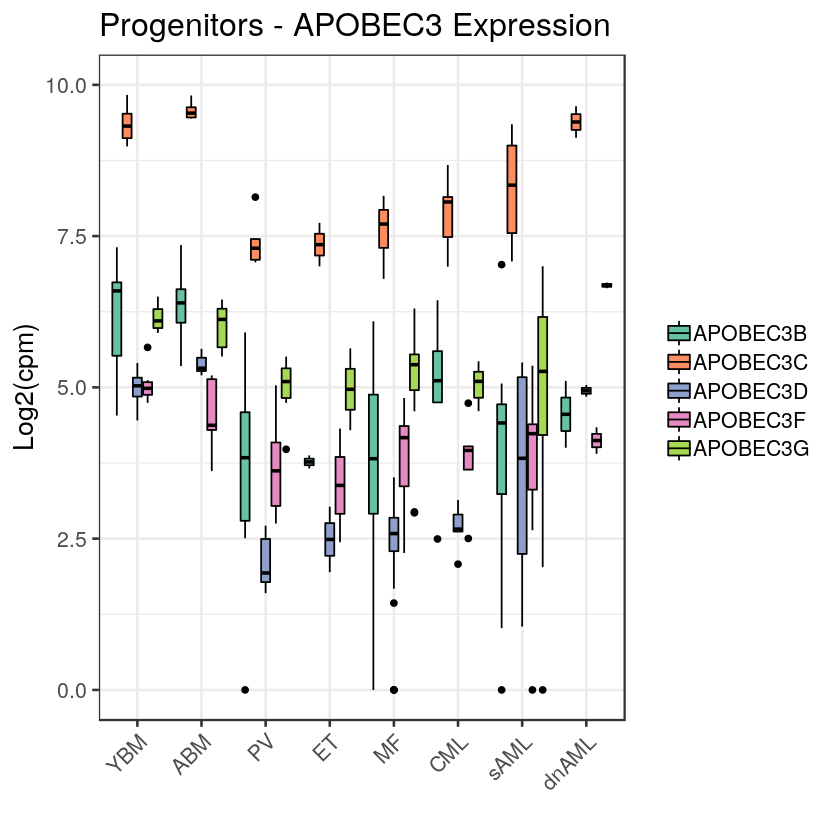

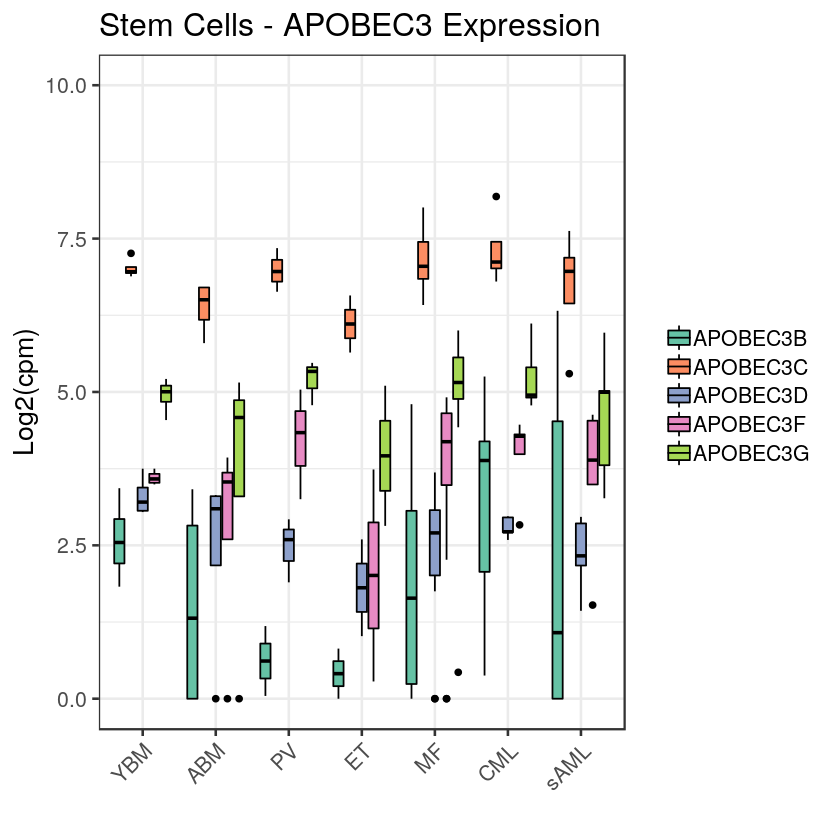

In [16]:
lcpm.Prog.APOBEC3 <- lcpm.Prog.APOBECs[,c(1:14, grep('APOBEC3[BCDFG]', colnames(lcpm.Prog.APOBECs)))]
lcpm.Prog.APOBEC3.m <- melt(lcpm.Prog.APOBEC3[,-c(1:12,14)], id=c("Sample.type3"))
lcpm.Prog.APOBEC3.m$variable <- factor(as.character(lcpm.Prog.APOBEC3.m$variable), 
                                      levels=c("APOBEC3B", "APOBEC3C", "APOBEC3D", 
                                              "APOBEC3F", "APOBEC3G"))
lcpm.Prog.APOBEC3.m$value[lcpm.Prog.APOBEC3.m$value < 0] <- 0
colnames(lcpm.Prog.APOBEC3.m)[1]<- "Phenotype"
lcpm.Prog.APOBEC3.m$Phenotype <- factor(as.character(lcpm.Prog.APOBEC3.m$Phenotype),
                                       levels=c("YBM", "ABM", "PV", "ET", "MF", "CML", "sAML", "dnAML"))
lcpm.Stem.APOBEC3 <- lcpm.Stem.APOBECs[,c(1:16, grep('APOBEC3[BCDFG]', colnames(lcpm.Stem.APOBECs)))]
lcpm.Stem.APOBEC3.m <- melt(lcpm.Stem.APOBEC3[,-c(1:15)], id=c("Phenotype2"))
lcpm.Stem.APOBEC3.m$variable <- factor(as.character(lcpm.Stem.APOBEC3.m$variable), 
                                      levels=c("APOBEC3B", "APOBEC3C", "APOBEC3D", 
                                              "APOBEC3F", "APOBEC3G"))
lcpm.Stem.APOBEC3.m$value[lcpm.Stem.APOBEC3.m$value < 0] <- 0 
colnames(lcpm.Stem.APOBEC3.m)[1]<- "Phenotype"
lcpm.Stem.APOBEC3.m$Phenotype <- factor(as.character(lcpm.Stem.APOBEC3.m$Phenotype),
                                       levels=c("YBM", "ABM", "PV", "ET", "MF", "CML", "sAML"))
#png(file="MPN_Prog_APOBEC3expr_boxplot_02252020.png", width=7, height=7, units='in', res=300)
ggboxplot(lcpm.Prog.APOBEC3.m, x="Phenotype", y="value", fill="variable", ylim=c(0,10), palette="Set2") +
    theme_bw(base_size=16) + ylab("Log2(cpm)") + xlab("") + 
    labs(title="Progenitors - APOBEC3 Expression") + theme(legend.title=element_text(size=0)) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
#dev.off()

#png(file="MPN_HSC_APOBEC3expr_boxplot_02252020.png", width=7, height=7, units='in', res=300)
ggboxplot(lcpm.Stem.APOBEC3.m, x="Phenotype", y="value", fill="variable", ylim=c(0,10),palette = "Set2") +
    theme_bw(base_size=16) + xlab("") + ylab("Log2(cpm)") + labs(title="Stem Cells - APOBEC3 Expression") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1))
#dev.off()

In [19]:
lcpm.Prog.APOBEC3C <- do.call(cbind, c(meta2.Prog.filt, lapply(10, function(y)   {
    i <- APOBEC.genes[y,]
    t <- data.frame(as.numeric(lcpm2.Prog[gsub("[.].*$", "", rownames(lcpm2.Prog)) %in% i[1]]))
    colnames(t) <- i[3]
    return(t)
})))
lcpm.Prog.APOBEC3C.All <- lcpm.Prog.APOBEC3C[-grep('672A', lcpm.Prog.APOBEC3C$Sample),]
head(lcpm.Prog.APOBEC3C.All)
lcpm.Prog.APOBEC3C <- lcpm.Prog.APOBEC3C[lcpm.Prog.APOBEC3C$Sample.type2 %in% "MF",]
lcpm.Stem.APOBEC3C <- do.call(cbind, c(meta2.Stem.filt, lapply(10, function(y)   {
    i <- APOBEC.genes[y,]
    t <- data.frame(LogCPM=as.numeric(lcpm2.Stem[gsub("[.].*$", "", rownames(lcpm2.Stem)) %in% i[1]]))
    colnames(t)<- i[3]
    return(t)
})))
lcpm.Stem.APOBEC3C.All <- lcpm.Stem.APOBEC3C
lcpm.Stem.APOBEC3C <- lcpm.Stem.APOBEC3C[lcpm.Stem.APOBEC3C$Sample.type2 %in% "MF",]

lcpm.Prog.APOBEC3C$APOBEC3C.expr <- ifelse(lcpm.Prog.APOBEC3C$APOBEC3C > 7.5, "High", "Low")
lcpm.Stem.APOBEC3C$APOBEC3C.expr <- ifelse(lcpm.Stem.APOBEC3C$APOBEC3C > 7.2, "High", "Low")
lcpm.APOBEC3C.list <- list(Prog=lcpm.Prog.APOBEC3C, Stem=lcpm.Stem.APOBEC3C)

File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,Sample.type2,Phenotype,Sample.type3,Sample.type4,Treatment_code2,Phenotype2,Phenotype3,Phenotype4,APOBEC3C
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
368_ACAGTG_S0,X368_ACAGTG_S0,pt368,Aged normal bone marrow,Aged,Normal,Sorted progenitors,368,Normal,BM,NBM,ABM,ABM,ABM,Healthy Control,ABM,ABM,ABM,9.496964
380_ACAGTG_S0,X380_ACAGTG_S0,pt380,Aged normal bone marrow,Aged,Normal,Sorted progenitors,380,Normal,BM,NBM,ABM,ABM,ABM,Healthy Control,ABM,ABM,ABM,9.442898
401_ACAGTG_S0,X401_ACAGTG_S0,pt401,Aged normal bone marrow,Aged,Normal,Sorted progenitors,401,Normal,BM,NBM,ABM,ABM,ABM,Healthy Control,ABM,ABM,ABM,9.568087
402_ACAGTG_S0,X402_ACAGTG_S0,pt402,Aged normal bone marrow,Aged,Normal,Sorted progenitors,402,Normal,BM,NBM,ABM,ABM,ABM,Healthy Control,ABM,ABM,ABM,9.611911
410_ACAGTG_S0,X410_ACAGTG_S0,pt410,Aged normal bone marrow,Aged,Normal,Sorted progenitors,410,Normal,BM,NBM,ABM,ABM,ABM,Healthy Control,ABM,ABM,ABM,9.681011
415_ACAGTG_S0,X415_ACAGTG_S0,pt415,Aged normal bone marrow,Aged,Normal,Sorted progenitors,415,Normal,BM,NBM,ABM,ABM,ABM,Healthy Control,ABM,ABM,ABM,9.824361


In [18]:
risk.meta <- read.csv(file="DNA_RNA_combined_meta_06072018.csv", stringsAsFactors=FALSE)
risk.meta$Condition2 <- risk.meta$Condition
risk.meta$Condition <- gsub("_1|_2", "", gsub("_PostPV|_PostET", "", risk.meta$Condition))
risk.meta$Condition <- gsub("HR_MF", "High_Risk", risk.meta$Condition)
risk.meta$Condition <- gsub("Int_MF", "Int_Risk", risk.meta$Condition)
risk.meta$Condition <- gsub("LR_MF", "Low_Risk", risk.meta$Condition)
risk.meta.Prog <- risk.meta[risk.meta$Cell_type %in% "Progenitor",]
risk.meta.Stem <- risk.meta[risk.meta$Cell_type %in% "Stem",]

In [20]:
lcpm.Stem.APOBEC3C$Risk <- risk.meta.Stem[match(lcpm.Prog.APOBEC3C$Patient_ID, risk.meta.Stem$Tumor_Sample_Barcode),"Condition"]
lcpm.Prog.APOBEC3C$Risk <- risk.meta.Prog[match(lcpm.Prog.APOBEC3C$Patient_ID, risk.meta.Prog$Tumor_Sample_Barcode),"Condition"]
lcpm.Stem.APOBEC3C$Risk[lcpm.Stem.APOBEC3C$Patient_ID %in% c("670B", "724")] <- "Int_Risk"

table(lcpm.Stem.APOBEC3C$Risk)
table(lcpm.Prog.APOBEC3C$Risk)


High_Risk  Int_Risk  Low_Risk 
        7        16         1 


High_Risk  Int_Risk  Low_Risk 
        7        16         1 

### Preprocess RNASeq Isoform Count Data and metadata

In [21]:
name <- "iso_comp"
name2 <- "20180417"
iso_rsem_new <- read.csv("all_isoforms_results_noControls.txt", sep="\t", stringsAsFactors=FALSE)
iso_counts_new <- iso_rsem_new[,sapply(colnames(iso_rsem_new), function(x) any(grepl(".results_expected_count",x)))]
colnames(iso_counts_new) <- gsub(".isoforms.results_expected_count","", colnames(iso_counts_new))
row.names(iso_counts_new) <- iso_rsem_new$transcript_id
    
iso_gene_table <- iso_rsem_new[,1:2]

iso_rsem_control <- read.csv("all_isoforms_results.txt", sep="\t", stringsAsFactors=FALSE)
iso_counts_control <- iso_rsem_control[,sapply(colnames(iso_rsem_control), function(x) any(grepl(".results_expected_count",x)))]
colnames(iso_counts_control) <- gsub(".isoforms.results_expected_count","", colnames(iso_counts_control))
row.names(iso_counts_control) <- iso_rsem_control$transcript_id


In [22]:
isos <- AnnotationDbi::select(Homo.sapiens, keys=gsub("[.].*$","", iso_gene_table$gene_id), columns=c("SYMBOL", "ENSEMBL", "ENTREZID"), 
                keytype="ENSEMBL")
iso_gene_table_anno <- cbind(iso_gene_table, isos[match(gsub("[.].*$","", iso_gene_table$gene_id), isos$ENSEMBL),2:3])


'select()' returned many:many mapping between keys and columns


In [23]:
risk.colors <- RColorBrewer::brewer.pal(n = 12,name = 'Paired')
names(risk.colors) <- c("AP_CML", "CML", "CP_CML", "CLL", "ET", "PV", "IR_MF", "HR_MF", "MF", "NBM", "sAML","dnAML")
risk.colors.sub <- risk.colors[names(risk.colors) %in% c("NBM", "PV", "ET", "MF", "CML", "AML")] 
risk.order <- as.numeric(factor(names(risk.colors.sub), levels=c("NBM", "PV", "ET", "MF", "CML", "sAML", "dnAML")))
risk.order
risk.colors.sub2 <- risk.colors.sub[risk.order]

[1] 5 3 2 4 1

In [24]:
load("gencodev19_ANNOT.RData")
ANNOT_out <- merge(ANNOT, iso_counts_control, by.x="transcript_id", by.y="row.names", all.y=TRUE)
ANNOT_protein_coding <- subset(ANNOT, gene_type == "protein_coding")
ANNOT_ncRNA <- subset(ANNOT, gene_type %in% c("lincRNA", "antisense", "processed_transcript","sense_overlapping", "sense_intronic") )
#make list of IDs to query
protein_coding_ids <- ANNOT_protein_coding$gene_id
ncRNA_ids <- ANNOT_ncRNA$gene_id

iso_gene_table_anno_pc <- iso_gene_table_anno[gsub("[.].*$","", iso_gene_table_anno$gene_id) %in%
                                             gsub("[.].*$","", protein_coding_ids),]
iso_counts_control_pc <- iso_counts_control[rownames(iso_counts_control) %in% iso_gene_table_anno_pc$transcript_id,]
iso_counts_new_pc <- iso_counts_new[rownames(iso_counts_new) %in% iso_gene_table_anno_pc$transcript_id,]
rownames(iso_counts_control_pc) <- gsub("[.].*$","", rownames(iso_counts_control_pc))
rownames(iso_counts_new_pc) <- gsub("[.].*$","", rownames(iso_counts_new_pc))
colnames(iso_counts_new_pc) <- gsub("X767_Stroma", "X767.Stroma", 
                                  gsub("X689_Stroma", "X689.Stroma", colnames(iso_counts_new_pc)))


In [25]:
meta2 <- meta2[-grep("X672A.PB.Prog_S3", meta2$Sample),]
meta2$Treatment_code2 <- NA
meta2$Treatment_code2 <- meta$Treatment_code2[match(gsub("_S[0-9]*$","",meta2$Sample), 
                                                    gsub("_S[0-9]*$","",meta$Sample))]
meta2[meta2$Treatment_code2 %in% c("pacritinib"), "Treatment_code2"] <- "JAK2inhibitor"
meta2$Condition_code <- NA
meta2$Risk <- meta$Condition_code[match(gsub("_S[0-9]*$","",meta2$Sample), 
                                                    gsub("_S[0-9]*$","",meta$Sample))]

In [26]:
NBM.Prog.meta <- meta2[which(meta2$Sample.type2 %in% c("NBM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
ABM.Prog.meta <- meta2[which(meta2$Sample.type3 %in% c("ABM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
YBM.Prog.meta <- meta2[which(meta2$Sample.type3 %in% c("YBM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
PV.Prog.meta <- meta2[which(meta2$Sample.type %in% c("PV") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
ET.Prog.meta <- meta2[which(meta2$Sample.type %in% c("ET") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
MF.Prog.meta <- meta2[which(meta2$Sample.type %in% c("MF") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]

CML.Prog.meta <- meta2[which(meta2$Sample.type %in% c("CML") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
sAML.Prog.meta <- meta2[which(meta2$Sample.type %in% c("sAML") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]
AML.Prog.meta <- meta2[which(meta2$Sample.type %in% c("AML") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Progenitor", "Sorted progenitors")),]

NBM.Prog.samps <- match(NBM.Prog.meta$Sample, colnames(iso_counts_control_pc))
ABM.Prog.samps <- match(ABM.Prog.meta$Sample, colnames(iso_counts_control_pc))
YBM.Prog.samps <- match(YBM.Prog.meta$Sample, colnames(iso_counts_control_pc))

PV.Prog.samps <- match(gsub("_S[0-9]+$", "", PV.Prog.meta$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
ET.Prog.samps <- match(gsub("_S[0-9]+$", "", ET.Prog.meta$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
MF.Prog.samps <- match(gsub("_S[0-9]+$", "", MF.Prog.meta$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

CML.Prog.samps <- match(gsub("_S[0-9]+$", "", CML.Prog.meta$Sample), 
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
sAML.Prog.samps <- match(gsub("_S[0-9]+$", "", sAML.Prog.meta$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
AML.Prog.samps <- match(gsub("_S[0-9]+$", "", AML.Prog.meta$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

In [30]:
#colnames(iso_counts_new)
meta2.Prog.filt2 <- meta2.Prog.filt[-grep("X672A.PB.Prog_S3", meta2.Prog.filt$Sample),]
meta2.Prog.all.filt2 <- meta2.Prog.all.filt[-grep("X672A.PB.Prog_S3", meta2.Prog.all.filt$Sample),]

NBM.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type2 %in% c("NBM")),]
ABM.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Phenotype %in% c("ABM")),]
YBM.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Phenotype %in% c("YBM")),]
PV.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("PV")),]
ET.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("ET")),]
MF.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("MF")),]
CML.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("CML")),]
sAML.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("sAML")),]
AML.Prog.meta.filt <- meta2.Prog.filt2[which(meta2.Prog.filt2$Sample.type %in% c("AML")),]

NBM.Prog.samps.f <- match(NBM.Prog.meta.filt$Sample, colnames(iso_counts_control_pc))
ABM.Prog.samps.f <- match(ABM.Prog.meta.filt$Sample, colnames(iso_counts_control_pc))
YBM.Prog.samps.f <- match(YBM.Prog.meta.filt$Sample, colnames(iso_counts_control_pc))

PV.Prog.samps.f <- match(gsub("_S[0-9]+$", "", PV.Prog.meta.filt$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
ET.Prog.samps.f <- match(gsub("_S[0-9]+$", "", ET.Prog.meta.filt$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
MF.Prog.samps.f <- match(gsub("_S[0-9]+$", "", MF.Prog.meta.filt$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
CML.Prog.samps.f <- match(gsub("_S[0-9]+$", "", CML.Prog.meta.filt$Sample), 
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
sAML.Prog.samps.f <- match(gsub("_S[0-9]+$", "", sAML.Prog.meta.filt$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_control_pc)))
AML.Prog.samps.f <- match(gsub("_S[0-9]+$", "", AML.Prog.meta.filt$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

In [28]:
#colnames(iso_counts_new)
NBM.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type2 %in% c("NBM")),]
ABM.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Phenotype %in% c("ABM")),]
YBM.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Phenotype %in% c("YBM")),]
PV.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type %in% c("PV")),]
ET.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type %in% c("ET")),]
MF.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type %in% c("MF")),]
CML.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type %in% c("CML")),]
AML.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$Sample.type %in% c("AML")),]

NBM.Stem.samps.f <- match(NBM.Stem.meta.filt$Sample, colnames(iso_counts_control_pc))
ABM.Stem.samps.f <- match(ABM.Stem.meta.filt$Sample, colnames(iso_counts_control_pc))
YBM.Stem.samps.f <- match(YBM.Stem.meta.filt$Sample, colnames(iso_counts_control_pc))

PV.Stem.samps.f <- match(gsub("_S[0-9]+$", "", PV.Stem.meta.filt$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
ET.Stem.samps.f <- match(gsub("_S[0-9]+$", "", ET.Stem.meta.filt$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
MF.Stem.samps.f <- match(gsub("_S[0-9]+$", "", MF.Stem.meta.filt$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
CML.Stem.samps.f <- match(gsub("_S[0-9]+$", "", CML.Stem.meta.filt$Sample), 
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
AML.Stem.samps.f <- match(gsub("_S[0-9]+$", "", AML.Stem.meta.filt$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

In [29]:
NBM.Stem.meta <- meta2[which(meta2$Sample.type2 %in% c("NBM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]

ABM.Stem.meta <- meta2[which(meta2$Sample.type3 %in% c("ABM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]

YBM.Stem.meta <- meta2[which(meta2$Sample.type3 %in% c("YBM") &
             meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]

PV.Stem.meta <- meta2[which(meta2$Sample.type %in% c("PV") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]

ET.Stem.meta <- meta2[which(meta2$Sample.type %in% c("ET") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]
MF.Stem.meta <- meta2[which(meta2$Sample.type %in% c("MF") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]
CML.Stem.meta <- meta2[which(meta2$Sample.type %in% c("CML") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]
AML.Stem.meta <- meta2[which(meta2$Sample.type %in% c("AML") & meta2$CellType %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem", "Sorted stem")),]

NBM.Stem.samps <- match(NBM.Stem.meta$Sample, colnames(iso_counts_control_pc))
ABM.Stem.samps <- match(ABM.Stem.meta$Sample, colnames(iso_counts_control_pc))
YBM.Stem.samps <- match(YBM.Stem.meta$Sample, colnames(iso_counts_control_pc))

PV.Stem.samps <- match(gsub("_S[0-9]+$", "", PV.Stem.meta$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

ET.Stem.samps <- match(gsub("_S[0-9]+$", "", ET.Stem.meta$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
MF.Stem.samps <- match(gsub("_S[0-9]+$", "", MF.Stem.meta$Sample),
                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
CML.Stem.samps <- match(gsub("_S[0-9]+$", "", CML.Stem.meta$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
AML.Stem.samps <- match(gsub("_S[0-9]+$", "", AML.Stem.meta$Sample),
                        gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))


### Prepare DGELists

In [31]:
iso_counts_filt.Prog.filt <- cbind(iso_counts_control_pc[,c(ABM.Prog.samps.f, YBM.Prog.samps.f)], 
                                   iso_counts_new_pc[,c(PV.Prog.samps.f, ET.Prog.samps.f, MF.Prog.samps.f,
                                                 CML.Prog.samps.f)], 
                                   iso_counts_control_pc[,sAML.Prog.samps.f], 
                                   iso_counts_new_pc[,AML.Prog.samps.f])
iso_counts_filt.Stem.filt <- cbind(iso_counts_control_pc[,c(ABM.Stem.samps.f, YBM.Stem.samps.f)], 
                             iso_counts_new_pc[,c(PV.Stem.samps.f, ET.Stem.samps.f, MF.Stem.samps.f,
                                                 CML.Stem.samps.f, AML.Stem.samps.f)])

meta.Prog.filt <- rbind(ABM.Prog.meta.filt, YBM.Prog.meta.filt, PV.Prog.meta.filt, 
                    ET.Prog.meta.filt, MF.Prog.meta.filt, CML.Prog.meta.filt, sAML.Prog.meta.filt, AML.Prog.meta.filt)
meta.Stem.filt <- rbind(ABM.Stem.meta.filt, YBM.Stem.meta.filt, PV.Stem.meta.filt, 
                    ET.Stem.meta.filt, MF.Stem.meta.filt, CML.Stem.meta.filt, AML.Stem.meta.filt)

id_list.Prog.filt <- gsub("[.].*$","", rownames(iso_counts_filt.Prog.filt))
id_list.Stem.filt <- gsub("[.].*$","", rownames(iso_counts_filt.Stem.filt))
rownames(iso_counts_filt.Prog.filt) <- id_list.Prog.filt
rownames(iso_counts_filt.Stem.filt) <- id_list.Stem.filt

DGE_all.Prog.filt <- DGEList(counts = iso_counts_filt.Prog.filt, lib.size = colSums(iso_counts_filt.Prog.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Prog.filt)), samples = meta.Prog.filt,
                      group = meta.Prog.filt$Phenotype, genes = id_list.Prog.filt, remove.zeros = FALSE) 
DGE_all.Prog.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id),
                                          id_list.Prog.filt),c("ENTREZID","SYMBOL")]

DGE_all.Stem.filt <- DGEList(counts = iso_counts_filt.Stem.filt, lib.size = colSums(iso_counts_filt.Stem.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Stem.filt)), samples = meta.Stem.filt,
                      group = meta.Stem.filt$Phenotype, genes = id_list.Stem.filt, remove.zeros = FALSE) 
DGE_all.Stem.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id)
                                                         ,id_list.Stem.filt),c("ENTREZID","SYMBOL")]

cpm.Prog.filt <- cpm(DGE_all.Prog.filt)
keep.exprs.Prog.filt <- rowSums(cpm.Prog.filt>1)>=20
DGE_all.Prog.filt <- DGE_all.Prog.filt[keep.exprs.Prog.filt,, keep.lib.sizes=FALSE]
DGE_all.Prog.filt <- calcNormFactors(DGE_all.Prog.filt, method = "TMM")

lcpm2.Prog.filt <- cpm(DGE_all.Prog.filt, log=TRUE)

cpm.Stem.filt <- cpm(DGE_all.Stem.filt)
keep.exprs.Stem.filt <- rowSums(cpm.Stem.filt>1)>=20
DGE_all.Stem.filt <- DGE_all.Stem.filt[keep.exprs.Stem.filt,, keep.lib.sizes=FALSE]
DGE_all.Stem.filt <- calcNormFactors(DGE_all.Stem.filt, method = "TMM")

lcpm2.Stem.filt <- cpm(DGE_all.Stem.filt, log=TRUE)

In [32]:
iso_counts_all <- cbind(iso_counts_control_pc, iso_counts_new_pc)
iso_counts_filt.Prog.all.filt <- iso_counts_all[,match(gsub("_S[0-9]+$", "", meta2.Prog.all.filt2$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_all)))]
iso_counts_filt.Stem.all.filt <- iso_counts_all[,match(gsub("_S[0-9]+$", "", meta2.Stem.all.filt$Sample), 
                       gsub("_S[0-9]+$", "", colnames(iso_counts_all)))]
dim(meta2.Prog.all.filt2)
dim(iso_counts_filt.Prog.all.filt)
dim(meta2.Stem.all.filt)
dim(iso_counts_filt.Stem.all.filt)

DGE_all.Prog.all.filt <- DGEList(counts = iso_counts_filt.Prog.all.filt, lib.size = colSums(iso_counts_filt.Prog.all.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Prog.all.filt)), samples = meta2.Prog.all.filt2,
                      group = meta2.Prog.all.filt2$Phenotype, genes = id_list.Prog.filt, remove.zeros = FALSE) 
DGE_all.Prog.all.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id),
                                          id_list.Prog.filt),c("ENTREZID","SYMBOL")]

DGE_all.Stem.all.filt <- DGEList(counts = iso_counts_filt.Stem.all.filt, lib.size = colSums(iso_counts_filt.Stem.all.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Stem.all.filt)), samples = meta2.Stem.all.filt,
                      group = meta2.Stem.all.filt$Phenotype, genes = id_list.Stem.filt, remove.zeros = FALSE) 
DGE_all.Stem.all.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id),
                                          id_list.Stem.filt),c("ENTREZID","SYMBOL")]

cpm.Prog.all.filt <- cpm(DGE_all.Prog.all.filt)
lcpm.Prog.all.filt <- cpm(DGE_all.Prog.all.filt, log=TRUE)
keep.exprs.Prog.filt <- rowSums(cpm.Prog.all.filt>1)>=15

DGE_all.Prog.all.filt <- DGE_all.Prog.all.filt[keep.exprs.Prog.filt,, keep.lib.sizes=FALSE]
DGE_all.Prog.all.filt <- calcNormFactors(DGE_all.Prog.all.filt, method = "TMM")

lcpm2.Prog.all.filt <- cpm(DGE_all.Prog.all.filt, log=TRUE)

cpm.Stem.all.filt <- cpm(DGE_all.Stem.all.filt)
lcpm.Stem.all.filt <- cpm(DGE_all.Stem.all.filt, log=TRUE)
keep.exprs.Stem.filt <- rowSums(cpm.Stem.all.filt>1)>=20
DGE_all.Stem.all.filt <- DGE_all.Stem.all.filt[keep.exprs.Stem.filt,, keep.lib.sizes=FALSE]
DGE_all.Stem.all.filt <- calcNormFactors(DGE_all.Stem.all.filt, method = "TMM")

lcpm2.Stem.all.filt <- cpm(DGE_all.Stem.all.filt, log=TRUE)

[1] 69 14

[1] 145641     69

[1] 47 14

[1] 145641     47

In [33]:
lcpm.Prog.APOBEC3C.All$Risk2 <- lcpm.Stem.APOBEC3C.All$Risk2 <- "None"
lcpm.Stem.APOBEC3C.All$Risk2 <- risk.meta.Stem[match(lcpm.Stem.APOBEC3C.All$Patient_ID, 
                                                     risk.meta.Stem$Tumor_Sample_Barcode),"Condition2"]

lcpm.Prog.APOBEC3C.All$Risk2 <- risk.meta.Prog[match(lcpm.Prog.APOBEC3C.All$Patient_ID, 
                                                     risk.meta.Prog$Tumor_Sample_Barcode),"Condition2"]
lcpm.Stem.APOBEC3C.All$Risk2[lcpm.Stem.APOBEC3C.All$Patient_ID %in% c("670B", "724")] <- "Int_MF"

lcpm.Stem.APOBEC3C.All$Risk2[lcpm.Stem.APOBEC3C.All$Phenotype %in% "ABM"] <- "ABM"
lcpm.Prog.APOBEC3C.All$Risk2[lcpm.Prog.APOBEC3C.All$Phenotype %in% "ABM"] <- "ABM"
lcpm.Stem.APOBEC3C.All$Risk2[lcpm.Stem.APOBEC3C.All$Phenotype %in% "YBM"] <- "YBM"
lcpm.Prog.APOBEC3C.All$Risk2[lcpm.Prog.APOBEC3C.All$Phenotype %in% "YBM"] <- "YBM"
lcpm.Prog.APOBEC3C.All$Risk2[lcpm.Prog.APOBEC3C.All$Phenotype3 %in% "sAML_UnTx"] <- "sAML"
lcpm.Stem.APOBEC3C.All$Risk2[lcpm.Stem.APOBEC3C.All$Phenotype2 %in% "sAML"] <- "sAML"
lcpm.Stem.APOBEC3C.All$Risk2[grep("Int", lcpm.Stem.APOBEC3C.All$Risk2)] <- "Int_MF"
lcpm.Prog.APOBEC3C.All$Risk2[grep("Int", lcpm.Prog.APOBEC3C.All$Risk2)] <- "Int_MF"
lcpm.Stem.APOBEC3C.All$Risk2[grep("HR", lcpm.Stem.APOBEC3C.All$Risk2)] <- "HR_MF"
lcpm.Prog.APOBEC3C.All$Risk2[grep("HR", lcpm.Prog.APOBEC3C.All$Risk2)] <- "HR_MF"

lcpm.Prog.APOBEC3C.All$Risk <- lcpm.Stem.APOBEC3C.All$Risk <- "None"
lcpm.Prog.APOBEC3C.All$Risk[lcpm.Prog.APOBEC3C.All$Phenotype2 %in% "MF"] <- risk.meta.Prog[
    match(lcpm.Prog.APOBEC3C.All$Patient_ID[lcpm.Prog.APOBEC3C.All$Phenotype2 %in% "MF"], 
         risk.meta.Prog$Tumor_Sample_Barcode),"Condition"]
lcpm.Stem.APOBEC3C.All$Risk[lcpm.Stem.APOBEC3C.All$Phenotype2 %in% "MF"] <- risk.meta.Stem[
    match(lcpm.Stem.APOBEC3C.All$Patient_ID[lcpm.Stem.APOBEC3C.All$Phenotype2 %in% "MF"], 
         risk.meta.Stem$Tumor_Sample_Barcode),"Condition"]
lcpm.Prog.APOBEC3C.All$Risk <- factor(lcpm.Prog.APOBEC3C.All$Risk, 
                                      levels=c("None", "Low_Risk", "Int_Risk", "High_Risk"))
lcpm.Stem.APOBEC3C.All$Risk <- factor(lcpm.Stem.APOBEC3C.All$Risk, 
                                      levels=c("None", "Low_Risk", "Int_Risk", "High_Risk"))

lcpm.Prog.APOBEC3C.All$Phenotype2 <- as.character(lcpm.Prog.APOBEC3C.All$Phenotype) 
lcpm.Stem.APOBEC3C.All$Phenotype2 <- as.character(lcpm.Stem.APOBEC3C.All$Phenotype)
lcpm.Prog.APOBEC3C.All$Phenotype2[which(lcpm.Prog.APOBEC3C.All$Phenotype %in% c("ABM"))] <- "Aged Normal" 
lcpm.Stem.APOBEC3C.All$Phenotype2[which(lcpm.Stem.APOBEC3C.All$Phenotype %in% c("ABM"))] <- "Aged Normal"
lcpm.Prog.APOBEC3C.All$Phenotype2[which(lcpm.Prog.APOBEC3C.All$Phenotype %in% c("YBM"))] <- "Young Normal" 
lcpm.Stem.APOBEC3C.All$Phenotype2[which(lcpm.Stem.APOBEC3C.All$Phenotype %in% c("YBM"))] <- "Young Normal"
lcpm.Prog.APOBEC3C.All$Phenotype2[which(lcpm.Prog.APOBEC3C.All$Phenotype %in% c("sAML"))] <- "sAML"
lcpm.Stem.APOBEC3C.All$Phenotype2[which(lcpm.Stem.APOBEC3C.All$Phenotype %in% c("AML"))] <- "sAML"
lcpm.Prog.APOBEC3C.All$Phenotype2 <- factor(lcpm.Prog.APOBEC3C.All$Phenotype2, 
                                            levels=c("Aged Normal", "Young Normal", "ET", "PV", "MF", "CML", "sAML", "dnML")) 
lcpm.Stem.APOBEC3C.All$Phenotype2 <- factor(lcpm.Stem.APOBEC3C.All$Phenotype2, 
                                            levels=c("Aged Normal", "Young Normal", "ET", "PV", "MF", "CML", "sAML"))
lcpm.Stem.APOBEC3C.All$Phenotype3 <- recode(lcpm.Stem.APOBEC3C.All$Phenotype2, AML="sAML",
                                            `Aged Normal`="ABM", `Young Normal`="YBM")
dim(lcpm.Stem.APOBEC3C.All)
dim(lcpm.Prog.APOBEC3C.All)

table(lcpm.Stem.APOBEC3C.All$Risk2)
lcpm.Stem.APOBEC3C.All$Risk2
table(lcpm.Prog.APOBEC3C.All$Risk2)
lcpm.Prog.APOBEC3C.All$Risk2

[1] 47 20

[1] 65 21


         ABM       AP_CML       BC_CML          CML       CP_CML           ET 
           4            1            1            1            2            2 
       HR_MF       Int_MF LR_MF_PostET           PV         sAML          YBM 
           9           15            1            2            5            4 

[1] "ABM"          "ABM"          "ABM"          "ABM"          "sAML"        
 [6] "sAML"         "sAML"         "sAML"         "sAML"         "CP_CML"      
[11] "BC_CML"       "CP_CML"       "CML"          "AP_CML"       "ET"          
[16] "ET"           "Int_MF"       "HR_MF"        "HR_MF"        "HR_MF"       
[21] "Int_MF"       "HR_MF"        "HR_MF"        "HR_MF"        "HR_MF"       
[26] "Int_MF"       "Int_MF"       "Int_MF"       "Int_MF"       "Int_MF"      
[31] "HR_MF"        "LR_MF_PostET" "Int_MF"       "Int_MF"       "Int_MF"      
[36] "Int_MF"       "Int_MF"       "Int_MF"       "HR_MF"        "Int_MF"      
[41] "Int_MF"       "PV"           "PV"           "YBM"          "YBM"         
[46] "YBM"          "YBM"


         ABM       AP_CML       BC_CML          CML       CP_CML           ET 
           8            1            1            1            2            2 
       HR_MF       Int_MF LR_MF_PostET           PV         sAML          YBM 
           7           18            1            4           10            8 

[1] "ABM"          "ABM"          "ABM"          "ABM"          "ABM"         
 [6] "ABM"          "ABM"          "ABM"          "sAML"         "sAML"        
[11] "sAML"         "CP_CML"       "BC_CML"       "CP_CML"       "CML"         
[16] "AP_CML"       NA             NA             "ET"           "ET"          
[21] "Int_MF"       "HR_MF"        "HR_MF"        "Int_MF"       "HR_MF"       
[26] "HR_MF"        "HR_MF"        "Int_MF"       "Int_MF"       "Int_MF"      
[31] "Int_MF"       "Int_MF"       "HR_MF"        "LR_MF_PostET" "Int_MF"      
[36] "Int_MF"       "Int_MF"       "Int_MF"       "Int_MF"       "Int_MF"      
[41] "Int_MF"       "Int_MF"       "HR_MF"        "Int_MF"       "Int_MF"      
[46] "PV"           "PV"           "Int_MF"       "PV"           "PV"          
[51] "sAML"         "sAML"         "sAML"         "sAML"         "sAML"        
[56] "sAML"         "sAML"         "YBM"          "YBM"          "YBM"         
[61] "YBM"          "YBM"          "YBM"          "YBM"          "YBM"

In [34]:
lcpm.Prog.APOBEC3C.Norm.MF <- lcpm.Prog.APOBEC3C.All[lcpm.Prog.APOBEC3C.All$Risk2 %in% c("ABM", "YBM", "Int_MF", "HR_MF", "sAML", "dnAML"),]
lcpm.Stem.APOBEC3C.Norm.MF <- lcpm.Stem.APOBEC3C.All[lcpm.Stem.APOBEC3C.All$Risk2 %in% c("ABM", "YBM", "Int_MF", "HR_MF", "sAML"),]
lcpm.Stem.APOBEC3C.Norm.MF$Risk2 <- factor(as.character(lcpm.Stem.APOBEC3C.Norm.MF$Risk2), 
                                          levels=c("ABM", "YBM", "Int_MF", "HR_MF", "sAML"))
lcpm.Prog.APOBEC3C.Norm.MF$Risk2 <- factor(as.character(lcpm.Prog.APOBEC3C.Norm.MF$Risk2), 
                                          levels=c("ABM", "YBM", "Int_MF", "HR_MF", "sAML"))
table(lcpm.Stem.APOBEC3C.Norm.MF$Risk2)
table(lcpm.Prog.APOBEC3C.Norm.MF$Risk2)
head(lcpm.Stem.APOBEC3C.Norm.MF)


   ABM    YBM Int_MF  HR_MF   sAML 
     4      4     15      9      5 


   ABM    YBM Int_MF  HR_MF   sAML 
     8      8     18      7     10 

File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,Sample.type2,Phenotype,Sample.type3,Sample.type4,Treatment_code2,Phenotype2,APOBEC3C,Risk2,Risk,Phenotype3
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
27_8,X27_8,368-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,368,Normal,BM,NBM,ABM,ABM,ABM,Healthy Control,Aged Normal,6.702666,ABM,None,ABM
26_2,X26_2,401-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,401,Normal,BM,NBM,ABM,ABM,ABM,Healthy Control,Aged Normal,6.303396,ABM,None,ABM
26_1,X26_1,410-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,410,Normal,BM,NBM,ABM,ABM,ABM,Healthy Control,Aged Normal,5.796631,ABM,None,ABM
26_7,X26_7,439-HSC,Aged normal bone marrow,Aged,Normal,Sorted stem,439,Normal,BM,NBM,ABM,ABM,ABM,Healthy Control,Aged Normal,6.705703,ABM,None,ABM
X591.BM.Stem,X591.BM.Stem_S0,591.BM.Stem,AML,Aged,AML,Stem,591,JAK2 V617F-,BM,sAML,AML,sAML,sAML_Tx,other,sAML,5.298314,sAML,None,sAML
X591.PB.Stem,X591.PB.Stem_S0,591.PB.Stem,AML,Aged,AML,Stem,591,JAK2 V617F-,PB,sAML,AML,sAML,sAML_Tx,other,sAML,7.625252,sAML,None,sAML


## Figure 1E
### APOBEC3C Expression in Aged and Young Normals and Myelofibrosis Samples in Hematopoietic Stem Cells

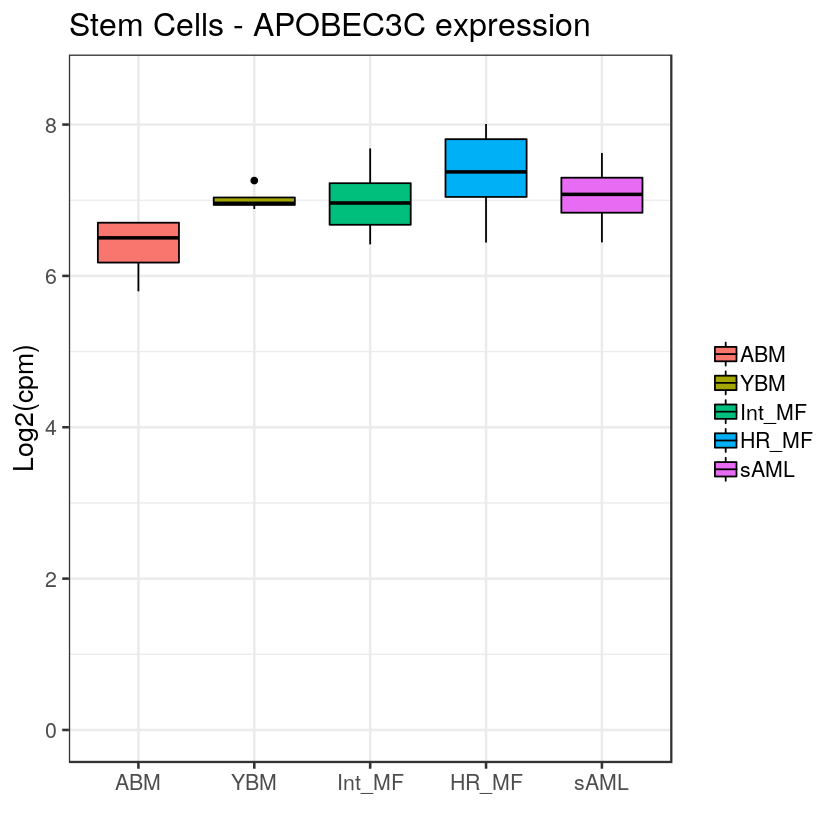

In [35]:
#pdf(file="MPN_Stem_Norm_MF_APOBEC3Cexpr_ggbox_nostats_04102020.pdf", width=7, height=7)
ggboxplot(subset(lcpm.Stem.APOBEC3C.Norm.MF, File_ID != "X591.BM.Stem"), #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Risk2", y="APOBEC3C", ylim=c(0,8.5), #add="mean_se", 
          fill="Risk2") + 
    #stat_compare_means(method="t.test", label = "p.format", ref.group="ABM", label.y=8, aes(label=format.pval(digits=1))) + 
    theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Stem Cells - APOBEC3C expression") +
    theme(legend.title=element_text(size=0)) + xlab("")
#dev.off()


## ADAR Isoform Expression Analysis
### ADAR transcripts are: "ENST00000368471", "ENST00000368474"

In [36]:
ADAR.tx <- c("ENST00000368471", "ENST00000368474")
ADAR.tx.exp.Prog.filt <- DGE_all.Prog.filt$counts[rownames(DGE_all.Prog.filt$counts) %in% ADAR.tx,]
ADAR.tx.exp.Stem.filt <- DGE_all.Stem.filt$counts[rownames(DGE_all.Stem.filt$counts) %in% ADAR.tx,]
ADAR.tx.lcpm.Prog.filt <- lcpm2.Prog.filt[rownames(lcpm2.Prog.filt) %in% ADAR.tx,]
ADAR.tx.lcpm.Stem.filt <- lcpm2.Stem.filt[rownames(lcpm2.Stem.filt) %in% ADAR.tx,]
ADAR.tx.lcpm.Prog.all.filt <- lcpm2.Prog.all.filt[rownames(lcpm2.Prog.all.filt) %in% ADAR.tx,]
ADAR.tx.lcpm.Stem.all.filt <- lcpm2.Stem.all.filt[rownames(lcpm2.Stem.all.filt) %in% ADAR.tx,]
ADAR.tx.lcpm.exp <- list(Prog=ADAR.tx.lcpm.Prog.filt, Stem=ADAR.tx.lcpm.Stem.filt)
ADAR.tx.lcpm <- do.call(cbind, ADAR.tx.lcpm.exp)
ADAR.tx.all.lcpm <- do.call(cbind, list(Prog=ADAR.tx.lcpm.Prog.all.filt, Stem=ADAR.tx.lcpm.Stem.all.filt))
ADAR.tx.ratios <- apply(ADAR.tx.lcpm, 2, function(x) x[2] - x[1])
names(ADAR.tx.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.ratios))
    
ADAR.tx.lcpm.Prog.ratios <- apply(ADAR.tx.lcpm.Prog.filt, 2, function(x) x[2] - x[1])
names(ADAR.tx.lcpm.Prog.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Prog.ratios))
ADAR.tx.lcpm.Prog.ratios.df <- data.frame(Sample=names(ADAR.tx.lcpm.Prog.ratios), 
                                          value=ADAR.tx.lcpm.Prog.ratios,
                                          Phenotype=factor(as.character(meta.Prog.filt[match(names(ADAR.tx.lcpm.Prog.ratios), 
                                                                gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Sample.type3"]), 
                                                           levels=c("ABM", "YBM","PV","ET", "MF", "CML", "sAML", "dnAML")))

ADAR.tx.lcpm.Stem.ratios <- apply(ADAR.tx.lcpm.Stem.filt, 2, function(x) x[2] - x[1])
names(ADAR.tx.lcpm.Stem.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Stem.ratios))
ADAR.tx.lcpm.Stem.ratios.df <- data.frame(Sample=names(ADAR.tx.lcpm.Stem.ratios), 
                                          value=ADAR.tx.lcpm.Stem.ratios,
                                          Phenotype=factor(as.character(meta.Stem.filt[match(names(ADAR.tx.lcpm.Stem.ratios), 
                                                                gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Phenotype2"]), 
                                                           levels=c("ABM", "YBM","PV","ET", "MF", "CML", "sAML")))


In [37]:
lcpm.Prog.APOBEC3C$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Prog.APOBEC3C$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.APOBEC3C$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Prog.APOBEC3C$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.APOBEC3C$ADARratio <- lcpm.Prog.APOBEC3C$ADARp150.expr - lcpm.Prog.APOBEC3C$ADARp110.expr

lcpm.Stem.APOBEC3C$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Stem.APOBEC3C$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.APOBEC3C$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Stem.APOBEC3C$Sample),
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.APOBEC3C$ADARratio <- lcpm.Stem.APOBEC3C$ADARp150.expr - lcpm.Stem.APOBEC3C$ADARp110.expr

In [38]:
lcpm.Prog.APOBEC3C.All$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Prog.APOBEC3C.All$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.APOBEC3C.All$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Prog.APOBEC3C.All$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.APOBEC3C.All$ADARratio <- lcpm.Prog.APOBEC3C.All$ADARp150.expr - lcpm.Prog.APOBEC3C.All$ADARp110.expr
lcpm.Stem.APOBEC3C.All$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Stem.APOBEC3C.All$Sample), 
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.APOBEC3C.All$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Stem.APOBEC3C.All$Sample),
                                                              gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.APOBEC3C.All$ADARratio <- lcpm.Stem.APOBEC3C.All$ADARp150.expr - lcpm.Stem.APOBEC3C.All$ADARp110.expr

lcpm.Prog.APOBEC3C.All$ADARp110.expr <- ifelse(lcpm.Prog.APOBEC3C.All$ADARp110.expr < -6, 0.01, 
                                           lcpm.Prog.APOBEC3C.All$ADARp110.expr)
lcpm.Prog.APOBEC3C.All$ADARratio <- lcpm.Prog.APOBEC3C.All$ADARp150.expr - lcpm.Prog.APOBEC3C.All$ADARp110.expr
lcpm.Prog.APOBEC3C.All$Cell.type <- gsub("^Progenitor$", "Progenitors", gsub("Sorted progenitors", "Progenitor", 
                                                                    as.character(lcpm.Prog.APOBEC3C.All$Cell.type)))
lcpm.Stem.APOBEC3C.All$ADARp110.expr <- ifelse(lcpm.Stem.APOBEC3C.All$ADARp110.expr < -6, 0.01, 
                                           lcpm.Stem.APOBEC3C.All$ADARp110.expr)
lcpm.Stem.APOBEC3C.All$ADARratio <- lcpm.Stem.APOBEC3C.All$ADARp150.expr - lcpm.Stem.APOBEC3C.All$ADARp110.expr
lcpm.Stem.APOBEC3C.All$Cell.type <- gsub("^Stem$", "Stem Cells", gsub("Sorted stem", "Stem", 
                                                                    as.character(lcpm.Stem.APOBEC3C.All$Cell.type)))
lcpm.Stem.APOBEC3C.All$Phenotype3 <- recode(lcpm.Stem.APOBEC3C.All$Phenotype2, AML="sAML",
                                            `Aged Normal`="ABM", `Young Normal`="YBM")
lcpm.APOBEC3C.All <- rbind(lcpm.Stem.APOBEC3C.All, lcpm.Prog.APOBEC3C.All[-18])
lcpm.APOBEC3C.All$Cell.type <- factor(lcpm.APOBEC3C.All$Cell.type)


## Figure 2D
### ADAR Isoform Ratio Barchart in Progenitor Cells

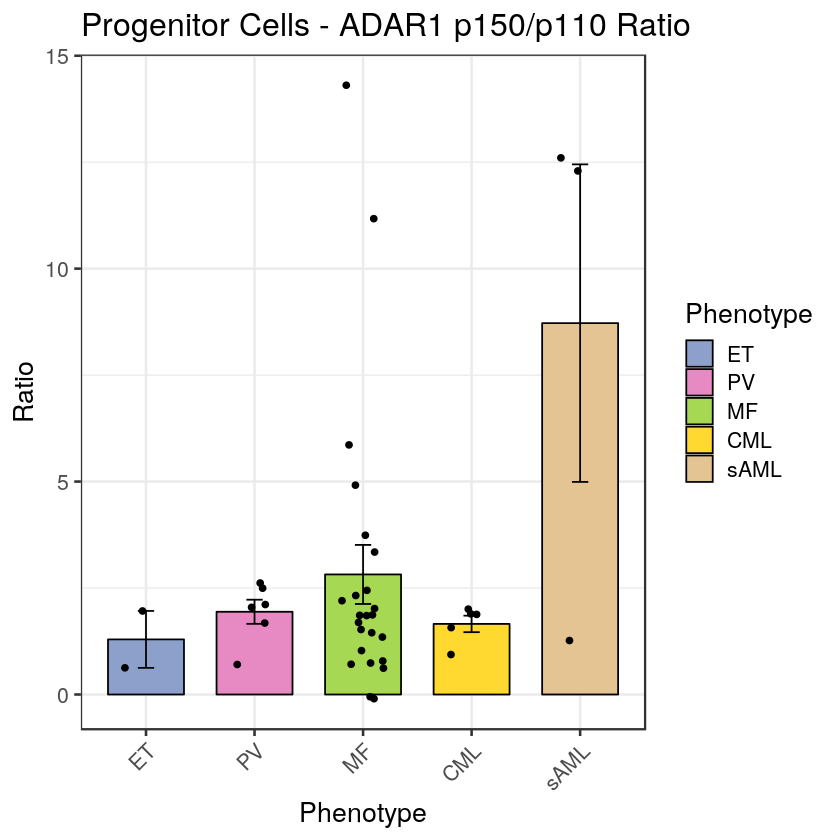

In [39]:
rownames(ADAR.tx.lcpm.Prog.filt) <- c("ADAR1-p110", "ADAR1-p150")

ADAR.tx.lcpm.Prog.filt2 <- ADAR.tx.lcpm.Prog.filt[,ADAR.tx.lcpm.Prog.filt[2,] > 0 ]
ADAR.tx.lcpm.Prog.ratios2 <- apply(ADAR.tx.lcpm.Prog.filt2, 2, function(x) x[2] - x[1])
names(ADAR.tx.lcpm.Prog.ratios2) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Prog.ratios2))
ADAR.tx.lcpm.Prog.ratios.df2 <- data.frame(Sample=names(ADAR.tx.lcpm.Prog.ratios2), 
                                          value=ADAR.tx.lcpm.Prog.ratios2,
                                          Phenotype=factor(as.character(meta2.Prog.filt[match(names(ADAR.tx.lcpm.Prog.ratios2), 
                                                                gsub("_S[0-9]+$","",meta2.Prog.filt$Sample)),"Sample.type3"]), 
                                                           levels=c("ABM", "YBM","ET", "PV", "MF", "CML", "sAML", "dnAML")))

ADAR.tx.lcpm.MPN.Prog.ratios.df2 <- subset(ADAR.tx.lcpm.Prog.ratios.df2, Phenotype == "ET" | Phenotype == "MF" |
                                 Phenotype == "PV" | Phenotype == "sAML" | Phenotype == "CML")  
#pdf(file="Holm_Jamieson_Prog_DetectableADARisoformRatio_MPNs_byPhenotype_04082020.pdf", width=7, height=7)
ggbarplot(ADAR.tx.lcpm.MPN.Prog.ratios.df2, x="Phenotype", y="value", add=c("mean_se", "jitter"), fill="Phenotype", 
         #palette = "Set2") +
          palette = c('#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F', '#E5C494')) + 
    theme_bw(base_size=16) + ylab("Ratio") + labs(title="Progenitor Cells - ADAR1 p150/p110 Ratio") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))
#dev.off()


## Figure 2D
### ADAR Isoform Ratio Barchart in Hematopoietic Stem Cells

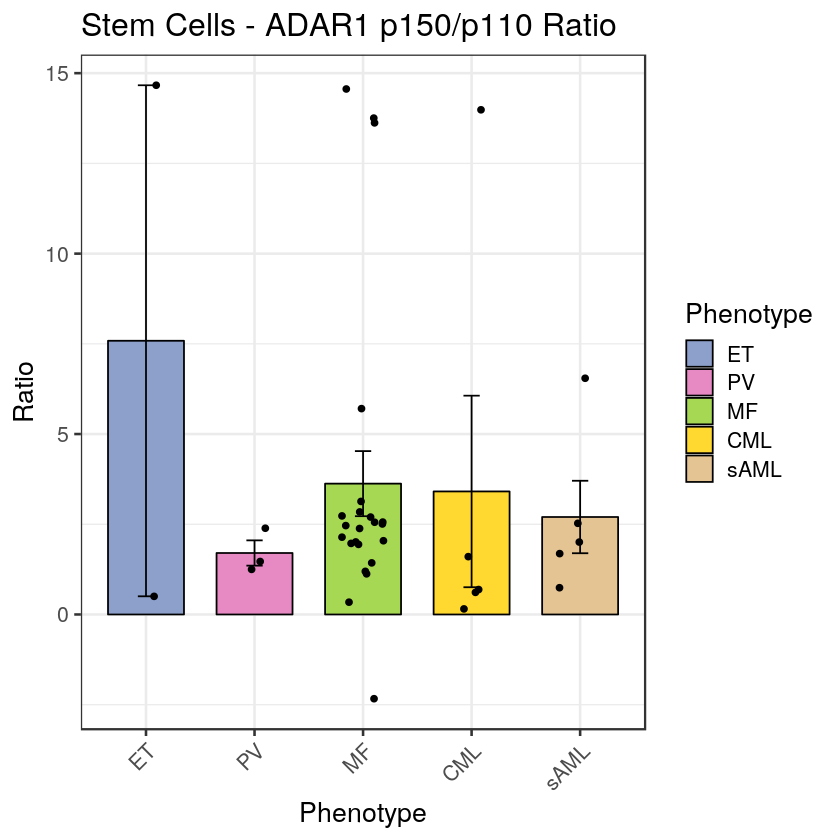

In [40]:
rownames(ADAR.tx.lcpm.Stem.filt) <- c("ADAR1-p110", "ADAR1-p150")

ADAR.tx.lcpm.Stem.filt2 <- ADAR.tx.lcpm.Stem.filt[,ADAR.tx.lcpm.Stem.filt[2,] > 0 ]
ADAR.tx.lcpm.Stem.ratios2 <- apply(ADAR.tx.lcpm.Stem.filt2, 2, function(x) x[2] - x[1])
names(ADAR.tx.lcpm.Stem.ratios2) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Stem.ratios2))
ADAR.tx.lcpm.Stem.ratios.df2 <- data.frame(Sample=names(ADAR.tx.lcpm.Stem.ratios2), 
                                          value=ADAR.tx.lcpm.Stem.ratios2,
                                          Phenotype=factor(as.character(meta2.Stem.filt[match(names(ADAR.tx.lcpm.Stem.ratios2), 
                                                                gsub("_S[0-9]+$","",meta2.Stem.filt$Sample)),"Phenotype2"]), 
                                                           levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML")))
ADAR.tx.lcpm.Stem.ratios.df2 <- ADAR.tx.lcpm.Stem.ratios.df2[!is.na(ADAR.tx.lcpm.Stem.ratios.df2$Phenotype),][-3,]

ADAR.tx.lcpm.MPN.Stem.ratios.df2 <- subset(ADAR.tx.lcpm.Stem.ratios.df2, Phenotype == "ET" | Phenotype == "MF" |
                                          Phenotype == "PV" | Phenotype == "sAML" | Phenotype == "CML")  
                                  
#pdf(file="Holm_Jamieson_Stem_DetectableADARisoformRatio_MPNs_byPhenotype_04082020.pdf", width=7, height=7)
ggbarplot(ADAR.tx.lcpm.MPN.Stem.ratios.df2, x="Phenotype", y="value", add=c("mean_se", "jitter"), fill="Phenotype", 
         #palette = "Set2") + 
         palette = c('#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F', '#E5C494')) +
    theme_bw(base_size=16) + ylab("Ratio") + labs(title="Stem Cells - ADAR1 p150/p110 Ratio") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))
#dev.off()


## Figure 2G
### Correlation of ADAR p150 Expression and APOBEC3C in MF Sample for both Progenitor and Stem Cells

Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.


,File_ID,Sample,ID,Sample.type,Age,Condition,Cell.type,Patient_ID,Mutation,CellType,⋯,Phenotype3,Phenotype4,APOBEC3C,Risk2,Risk,ADARp110.expr,ADARp150.expr,ADARratio,Status,RiskStatus
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
15,X616.BM.Prog,X616.BM.Prog,616.BM.Prog,CML,Young,CP CML,Progenitors,616,NA,BM,⋯,CML,CML,8.062915,CP_CML,None,5.618934,7.188428,1.5694939,,None
16,X703.PB.Prog,X703.PB.Prog,703.PB.Prog,CML,Young,CML,Progenitors,703,BCR-ABL+,PB,⋯,CML,CML,8.146059,CML,None,5.891127,6.830087,0.9389607,,None
17,X727.PB.Prog,X727.PB.Prog,727.PB.Prog,CML,Young,AP CML,Progenitors,727,BCR-ABL+,PB,⋯,CML,CML,7.484590,AP_CML,None,5.779309,7.673530,1.8942219,,None
18,20_MDStoAML,X20_MDStoAML,RO50113,sAML,NA,de novo AML,Progenitors,50113,NA,NA,⋯,NA,dnAML,9.645811,NA,None,6.538042,2.654467,-3.8835744,,None
19,19_MDStoAML,X19_MDStoAML,RO50120,sAML,NA,de novo AML,Progenitors,50120,NA,NA,⋯,NA,dnAML,9.124673,NA,None,7.066585,2.886621,-4.1799648,,None
20,X431.PB.Prog,X431.PB.Prog,431.PB.Prog,ET,Mid,ET,Progenitors,431,JAK2 V617F+,PB,⋯,ET,ET,7.718423,ET,None,6.556248,7.181865,0.6256179,,None



  ABM   YBM    ET    PV    MF   CML  sAML dnAML 
    4     1     2     6    24     5     3     2 

Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.


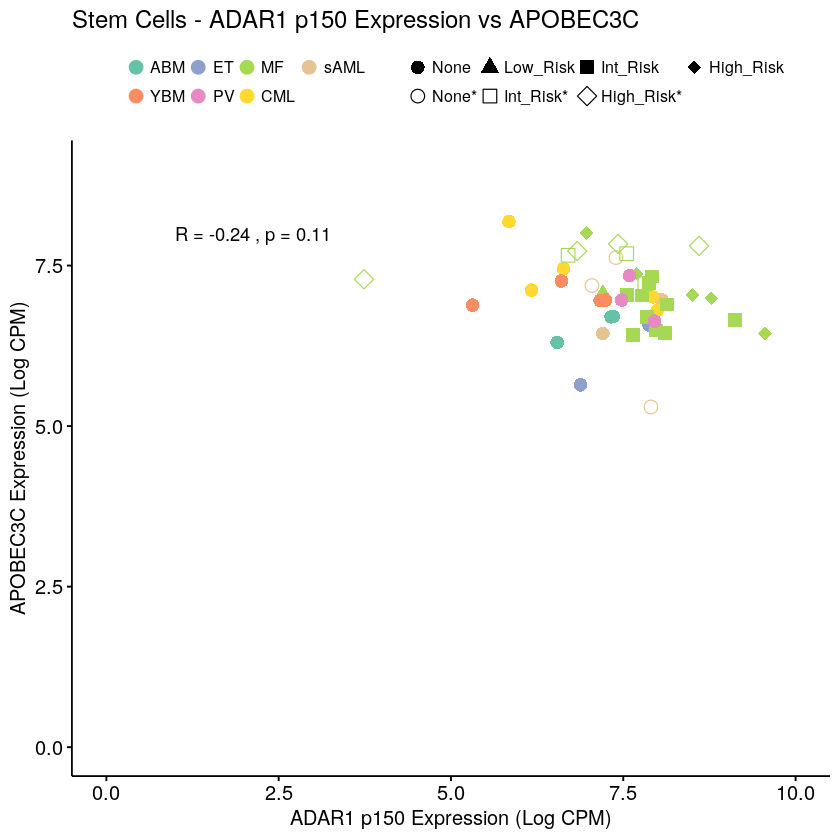

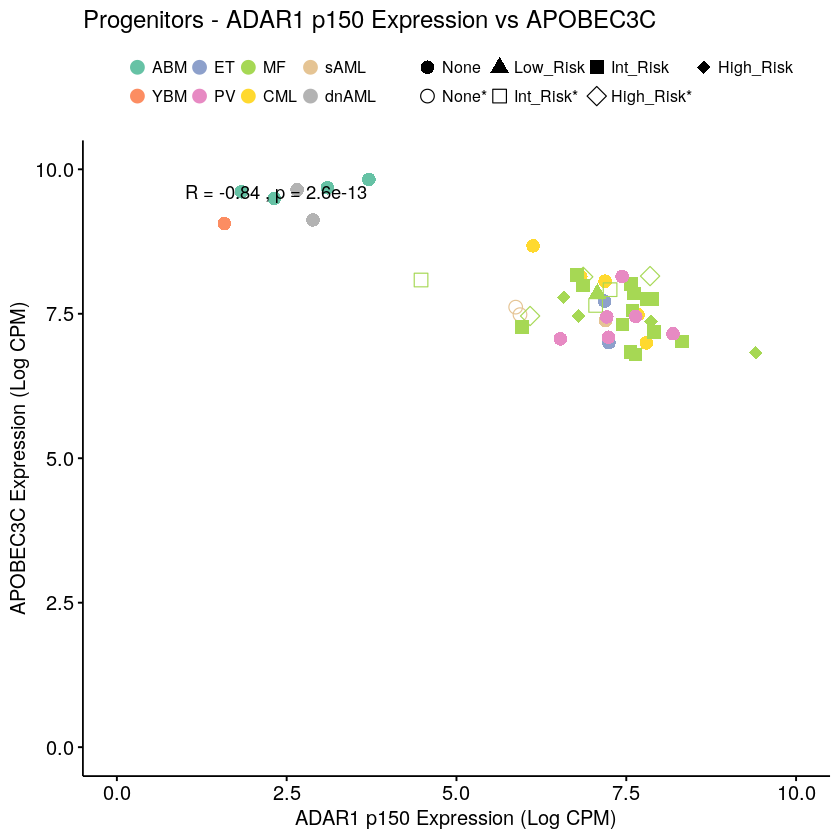

In [43]:
lcpm.Stem.APOBEC3C.filt <- subset(lcpm.Stem.APOBEC3C.All, ADARp150.expr > 0)
lcpm.Stem.APOBEC3C.filt$Status <- rep("",nrow(lcpm.Stem.APOBEC3C.filt))
lcpm.Stem.APOBEC3C.filt$Status[lcpm.Stem.APOBEC3C.filt$Patient_ID %in% c("591", "560", "566", "567", "573","576",
                                                                       "666", "599", "735", "672")] <- "*"
lcpm.Stem.APOBEC3C.filt$RiskStatus <- factor(paste0(as.character(lcpm.Stem.APOBEC3C.filt$Risk),
                                                  lcpm.Stem.APOBEC3C.filt$Status), 
                                            levels=c('None', 'None*', 'Low_Risk', 'Low_Risk*', 'Int_Risk*',
                                                     'Int_Risk','High_Risk*', 'High_Risk'))
lcpm.Stem.APOBEC3C.filt$RiskStatusSize <- as.numeric(lcpm.Stem.APOBEC3C.filt$RiskStatus)
lcpm.Stem.APOBEC3C.filt$RiskStatusSize[lcpm.Stem.APOBEC3C.filt$RiskStatusSize != 8] <- 3.5
lcpm.Stem.APOBEC3C.filt$RiskStatusSize[lcpm.Stem.APOBEC3C.filt$RiskStatusSize == 8] <- 5
lcpm.Stem.APOBEC3C.filt$Sample.type3 <- factor(as.character(lcpm.Stem.APOBEC3C.filt$Sample.type3),
                                             levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML"))
#png(file="MPN_HSC_APOBEC3Cexpr_vs_ADARp150expr_ggScatter_shapeRisk_withSurvival2_04102020.png", width=7, height=7, , units = 'in', res = 300)
ggscatter(lcpm.Stem.APOBEC3C.filt,
          x="ADARp150.expr", y="APOBEC3C", color="Sample.type3", shape = "RiskStatus", #label="Status", 
          font.label=c(16,"plain"), xlim=c(0,10), ylim=c(0,9), palette="Set2",
          title = "Stem Cells - ADAR1 p150 Expression vs APOBEC3C",size=3.5#, size="RiskStatusSize"
         ) +
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          stat_cor(output.type = "text", label.x = 1, na.rm=TRUE) + 
          scale_shape_manual(values=c(16,1,17,0,15,5,18)) + #scale_fill_manual(values=c(0,0.99)) +
          scale_size_manual(values=c(4,4,4,4,4,4,7)) + 
          ylab("APOBEC3C Expression (Log CPM)") + xlab("ADAR1 p150 Expression (Log CPM)") + 
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4)))
#dev.off()

lcpm.Prog.APOBEC3C.filt <- subset(lcpm.Prog.APOBEC3C.All, ADARp150.expr > 0)
lcpm.Prog.APOBEC3C.filt$Status <- rep("",nrow(lcpm.Prog.APOBEC3C.filt))
lcpm.Prog.APOBEC3C.filt$Status[lcpm.Prog.APOBEC3C.filt$Patient_ID %in% c("591", "560", "566", "567", "573","576",
                                                                       "666", "599", "735", "672")] <- "*"
lcpm.Prog.APOBEC3C.filt$RiskStatus <- factor(paste0(as.character(lcpm.Prog.APOBEC3C.filt$Risk), 
                                                  lcpm.Prog.APOBEC3C.filt$Status), 
                                            levels=c('None', 'None*', 'Low_Risk', 'Low_Risk*', 'Int_Risk*',
                                                     'Int_Risk','High_Risk*', 'High_Risk'))
lcpm.Prog.APOBEC3C.filt$Sample.type3 <- factor(as.character(lcpm.Prog.APOBEC3C.filt$Sample.type3),
                                             levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML", "dnAML"))
lcpm.Prog.APOBEC3C.filt[10:15,]
table(lcpm.Prog.APOBEC3C.filt$Sample.type3)
#png(file="MPN_Prog_APOBEC3Cexpr_vs_ADARp150expr_ggScatter_shapeRisk_withSurvival2_04102020.png", width=7, height=7, , units = 'in', res = 300)
ggscatter(lcpm.Prog.APOBEC3C.filt,
          x="ADARp150.expr", y="APOBEC3C", color = "Sample.type3", shape="RiskStatus", #label="Status", 
          font.label=c(16,"plain"), xlim=c(0,10), ylim=c(0,10), palette="Set2",
          title = "Progenitors - ADAR1 p150 Expression vs APOBEC3C", size=3.5) +
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          stat_cor(output.type = "text", label.x = 1, na.rm=TRUE) + 
          scale_shape_manual(values=c(16,1,17,0,15,5,18)) + 
          ylab("APOBEC3C Expression (Log CPM)") + xlab("ADAR1 p150 Expression (Log CPM)") + 
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4)))
#dev.off()

### Process Expression of STAT3 Isoforms in MPN Dataset

In [44]:
ENST2EG2SYM <- toTable(org.Hs.egENSEMBLTRANS2EG)
ENST2EG2SYM$SYM <- ENS2EG2SYM[match(ENST2EG2SYM$gene_id, ENS2EG2SYM$gene_id),"SYM"]

In [45]:
STAT3.ENST <- ENST2EG2SYM[ENST2EG2SYM$gene_id %in% "6774",]
STAT3.tx <- c("ENST00000264657", "ENST00000585517", "ENST00000588969", "ENST00000404395", "ENST00000389272",
"ENST00000588065", "ENST00000590776", "ENST00000462286", "ENST00000471989", "ENST00000491272", 
"ENST00000462269", "ENST00000498330", "ENST00000585360", "ENST00000478276")

STAT3.tx.exp.Prog.filt <- DGE_all.Prog.filt$counts[rownames(DGE_all.Prog.filt$counts) %in% STAT3.tx,]
STAT3.tx.exp.Stem.filt <- DGE_all.Stem.filt$counts[rownames(DGE_all.Stem.filt$counts) %in% STAT3.tx,]
dim(STAT3.tx.exp.Prog.filt)
rownames(STAT3.tx.exp.Prog.filt)
dim(STAT3.tx.exp.Stem.filt)
rownames(STAT3.tx.exp.Stem.filt)

[1]  8 65

[1] "ENST00000264657" "ENST00000389272" "ENST00000404395" "ENST00000462269"
[5] "ENST00000462286" "ENST00000585517" "ENST00000588969" "ENST00000590776"

[1]  7 47

[1] "ENST00000264657" "ENST00000389272" "ENST00000404395" "ENST00000462286"
[5] "ENST00000585517" "ENST00000588969" "ENST00000590776"

In [46]:
STAT3.tx.lcpm.Prog <- lcpm2.Prog.all.filt[rownames(lcpm2.Prog.all.filt) %in% STAT3.tx,]

STAT3.lcpm.Prog.filt <- STAT3.tx.lcpm.Prog
STAT3.lcpm.Prog.filt.pheno <- cbind(Gene=rownames(STAT3.lcpm.Prog.filt), STAT3.lcpm.Prog.filt)

STAT3.lcpm.Prog.filt.pheno.melt <- melt(STAT3.lcpm.Prog.filt.pheno[,-1])
STAT3.lcpm.Prog.filt.pheno.melt[,c("Sample.type2", "Sample.type3")] <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),
                                                            c("Sample.type2", "Sample.type3")]
STAT3.lcpm.Prog.filt.pheno.melt$Phenotype <- STAT3.lcpm.Prog.filt.pheno.melt$Sample.type2
STAT3.lcpm.Prog.filt.pheno.melt$Phenotype[STAT3.lcpm.Prog.filt.pheno.melt$Sample.type3 %in% "sAML"] <- "sAML"
STAT3.lcpm.Prog.filt.pheno.melt$Phenotype[STAT3.lcpm.Prog.filt.pheno.melt$Sample.type3 %in% "dnAML"] <- "dnAML"
STAT3.lcpm.Prog.filt.pheno.melt <- STAT3.lcpm.Prog.filt.pheno.melt[!is.na(STAT3.lcpm.Prog.filt.pheno.melt$Phenotype),]
STAT3.lcpm.Prog.filt.pheno.melt$Phenotype <- factor(as.character(STAT3.lcpm.Prog.filt.pheno.melt$Phenotype), 
                                              levels=c("NBM", "ET", "PV","MF", "CML", "sAML", "dnAML"))

colnames(STAT3.lcpm.Prog.filt.pheno.melt)[1] <- "Gene" 
STAT3.lcpm.Prog.filt.pheno.melt <- STAT3.lcpm.Prog.filt.pheno.melt[!is.na(STAT3.lcpm.Prog.filt.pheno.melt$Gene),]
STAT3.lcpm.Prog.filt.pheno.melt$value <- as.numeric(as.character(STAT3.lcpm.Prog.filt.pheno.melt$value))

STAT3.lcpm.Prog.filt.pheno.melt$Phenotype2 <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Sample.type3"]
STAT3.lcpm.Prog.filt.pheno.melt$Phenotype2 <- factor(as.character(STAT3.lcpm.Prog.filt.pheno.melt$Phenotype2), 
                                              levels=c("ABM", "YBM", "ET", "PV", "MF", "CML", "sAML", "dnAML"))
STAT3.lcpm.Prog.filt.pheno.melt$Patient_ID <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Patient_ID"]



In [47]:
STAT3.tx.lcpm.Stem <- lcpm2.Stem.all.filt[rownames(lcpm2.Stem.all.filt) %in% STAT3.tx,]

STAT3.lcpm.Stem.filt <- STAT3.tx.lcpm.Stem
STAT3.lcpm.Stem.filt.pheno <- cbind(Gene=rownames(STAT3.lcpm.Stem.filt), STAT3.lcpm.Stem.filt)
STAT3.lcpm.Stem.filt.pheno.melt <- melt(STAT3.lcpm.Stem.filt.pheno[,-1])
STAT3.lcpm.Stem.filt.pheno.melt[c("Sample.type2", "Sample.type3")] <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),c("Sample.type2", "Sample.type3")]
STAT3.lcpm.Stem.filt.pheno.melt$Phenotype <- STAT3.lcpm.Stem.filt.pheno.melt$Sample.type2
STAT3.lcpm.Stem.filt.pheno.melt$Phenotype[STAT3.lcpm.Stem.filt.pheno.melt$Sample.type3 %in% "sAML"] <- "sAML"
STAT3.lcpm.Stem.filt.pheno.melt <- STAT3.lcpm.Stem.filt.pheno.melt[!is.na(STAT3.lcpm.Stem.filt.pheno.melt$Phenotype),]

STAT3.lcpm.Stem.filt.pheno.melt$Phenotype <- factor(as.character(STAT3.lcpm.Stem.filt.pheno.melt$Phenotype), 
                                              levels=c("NBM", "ET", "PV","MF", "CML", "sAML"))

colnames(STAT3.lcpm.Stem.filt.pheno.melt)[1] <- "Gene" 
STAT3.lcpm.Stem.filt.pheno.melt <- STAT3.lcpm.Stem.filt.pheno.melt[!is.na(STAT3.lcpm.Stem.filt.pheno.melt$Gene),]
STAT3.lcpm.Stem.filt.pheno.melt$value <- as.numeric(as.character(STAT3.lcpm.Stem.filt.pheno.melt$value))

STAT3.lcpm.Stem.filt.pheno.melt$Phenotype2 <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Sample.type3"]
STAT3.lcpm.Stem.filt.pheno.melt$Phenotype2 <- factor(as.character(STAT3.lcpm.Stem.filt.pheno.melt$Phenotype2), 
                                              levels=c("ABM", "YBM", "PV","ET", "MF", "CML", "sAML"))
STAT3.lcpm.Stem.filt.pheno.melt$Patient_ID <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Patient_ID"]


In [48]:
STAT3alphabeta.tx <- c("ENST00000264657", "ENST00000585517")
STAT3ab.tx.lcpm.Prog <- lcpm2.Prog.all.filt[rownames(lcpm2.Prog.all.filt) %in% STAT3alphabeta.tx,]

STAT3ab.lcpm.Prog.filt <- STAT3ab.tx.lcpm.Prog
STAT3ab.lcpm.Prog.filt.pheno <- cbind(Gene=rownames(STAT3ab.lcpm.Prog.filt), STAT3ab.lcpm.Prog.filt)

STAT3ab.lcpm.Prog.filt.pheno.melt <- melt(STAT3ab.lcpm.Prog.filt.pheno[,-1])
STAT3ab.lcpm.Prog.filt.pheno.melt[,c("Sample.type2", "Sample.type3")] <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),
                                                            c("Sample.type2", "Sample.type3")]
STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype <- STAT3ab.lcpm.Prog.filt.pheno.melt$Sample.type2
STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype[STAT3ab.lcpm.Prog.filt.pheno.melt$Sample.type4 %in% "sAML"] <- "sAML"
STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype[STAT3ab.lcpm.Prog.filt.pheno.melt$Sample.type4 %in% "dnAML"] <- "dnAML"

STAT3ab.lcpm.Prog.filt.pheno.melt <- STAT3ab.lcpm.Prog.filt.pheno.melt[!is.na(STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype),]
STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype <- factor(as.character(STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype), 
                                              levels=c("NBM", "ET", "PV", "MF", "CML", "sAML", "dnAML"))

colnames(STAT3ab.lcpm.Prog.filt.pheno.melt)[1] <- "Gene" 
STAT3ab.lcpm.Prog.filt.pheno.melt <- STAT3ab.lcpm.Prog.filt.pheno.melt[!is.na(STAT3ab.lcpm.Prog.filt.pheno.melt$Gene),]
STAT3ab.lcpm.Prog.filt.pheno.melt$value <- as.numeric(as.character(STAT3ab.lcpm.Prog.filt.pheno.melt$value))
STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype2 <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Sample.type3"]
STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype2 <- factor(as.character(STAT3ab.lcpm.Prog.filt.pheno.melt$Phenotype2), 
                                              levels=c("ABM", "YBM", "ET", "PV","MF", "CML", "sAML", "dnAML"))
STAT3ab.lcpm.Prog.filt.pheno.melt$Patient_ID <- meta.Prog.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Prog.filt$Sample)),"Patient_ID"]

STAT3ab.tx.lcpm.Stem <- lcpm2.Stem.all.filt[rownames(lcpm2.Stem.all.filt) %in% STAT3alphabeta.tx,]

STAT3ab.lcpm.Stem.filt <- STAT3ab.tx.lcpm.Stem
STAT3ab.lcpm.Stem.filt.pheno <- cbind(Gene=rownames(STAT3ab.lcpm.Stem.filt), STAT3ab.lcpm.Stem.filt)
STAT3ab.lcpm.Stem.filt.pheno.melt <- melt(STAT3ab.lcpm.Stem.filt.pheno[,-1])
STAT3ab.lcpm.Stem.filt.pheno.melt[c("Sample.type2", "Sample.type3")] <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),c("Sample.type2", "Sample.type3")]
STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype <- STAT3ab.lcpm.Stem.filt.pheno.melt$Sample.type2
STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype[STAT3ab.lcpm.Stem.filt.pheno.melt$Sample.type3 %in% "sAML"] <- "sAML"
STAT3ab.lcpm.Stem.filt.pheno.melt <- STAT3ab.lcpm.Stem.filt.pheno.melt[!is.na(STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype),]

STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype <- factor(as.character(STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype), 
                                              levels=c("NBM", "ET", "PV","MF", "CML", "sAML"))

colnames(STAT3ab.lcpm.Stem.filt.pheno.melt)[1] <- "Gene" 
STAT3ab.lcpm.Stem.filt.pheno.melt <- STAT3ab.lcpm.Stem.filt.pheno.melt[!is.na(STAT3ab.lcpm.Stem.filt.pheno.melt$Gene),]
STAT3ab.lcpm.Stem.filt.pheno.melt$value <- as.numeric(as.character(STAT3ab.lcpm.Stem.filt.pheno.melt$value))
STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype2 <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Sample.type3"]
STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype2 <- factor(as.character(STAT3ab.lcpm.Stem.filt.pheno.melt$Phenotype2), 
                                              levels=c("ABM", "YBM","ET", "PV", "MF", "CML", "sAML"))
STAT3ab.lcpm.Stem.filt.pheno.melt$Patient_ID <- meta.Stem.filt[match(gsub("_S[0-9]+$","",STAT3ab.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta.Stem.filt$Sample)),"Patient_ID"]

In [49]:
STAT3ab.tx.lcpm.exp <- list(Prog=STAT3ab.lcpm.Prog.filt, Stem=STAT3ab.lcpm.Stem.filt)

## Supplemental Figure S5B
### STAT3 alpha Isoform Expression Boxplot in Normal and MPNs for both Progenitor and HS Cells

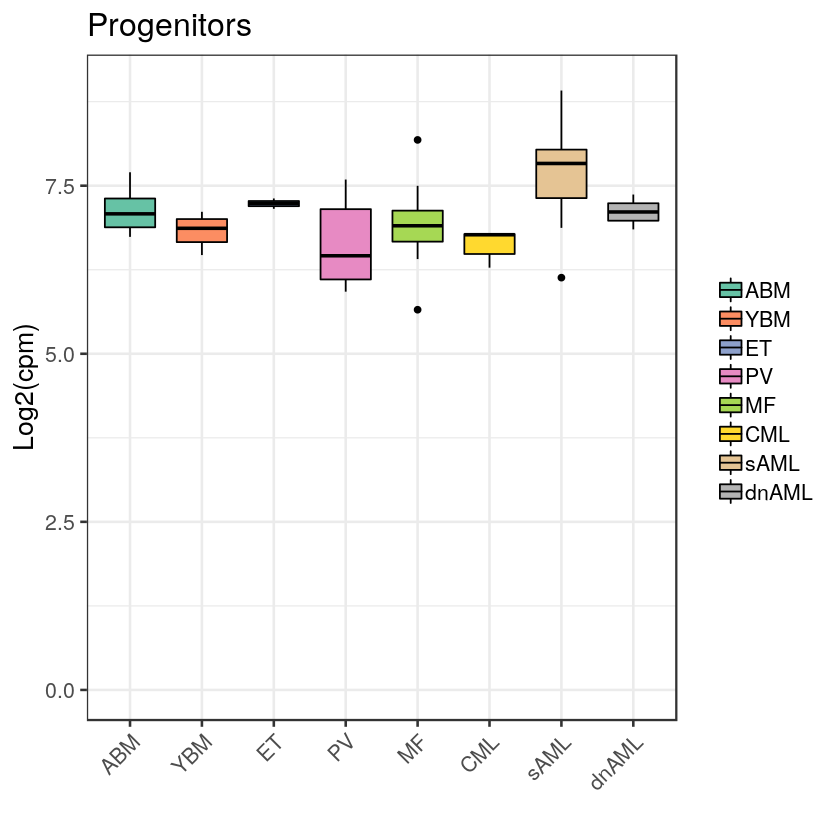

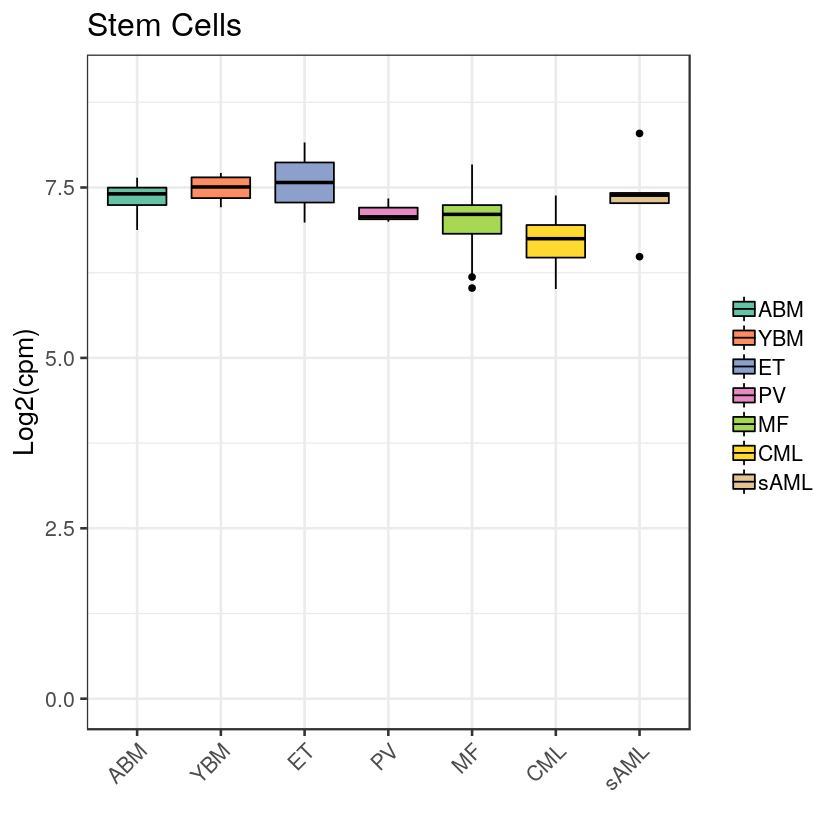

In [50]:
STAT3a.lcpm.Prog.filt.pheno.melt <- subset(STAT3ab.lcpm.Prog.filt.pheno.melt, Gene=="ENST00000264657")
STAT3a.lcpm.Stem.filt.pheno.melt <- subset(STAT3ab.lcpm.Stem.filt.pheno.melt, Gene=="ENST00000264657")

#pdf(file="Holm_Jamieson_Prog_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype.pdf", width=7, height=7)
#png(file="Holm_Jamieson_Prog_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype_04142020.png", width=7, height=7, units = 'in', res = 300)
ggboxplot(STAT3a.lcpm.Prog.filt.pheno.melt, #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Phenotype2", y="value", palette="Set2",#ylim=c(-1,8), #add="mean_se", 
          fill="Phenotype2") + ylim(c(0,9)) + xlab("") +
          #stat_compare_means(method="t.test", label = "p.signif", ref.group="ABM", label.y=8.8) + 
          theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Progenitors") +
          theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust=1)) #+ 
          #stat_compare_means(method="t.test", label = "p.format", ref.group="ABM", label.y=9) 
#dev.off()

#pdf(file="Holm_Jamieson_Stem_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype.pdf", width=7, height=7)
#png(file="Holm_Jamieson_Stem_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype_041420202.png", width=7, height=7, , units = 'in', res = 300)
ggboxplot(STAT3a.lcpm.Stem.filt.pheno.melt, #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Phenotype2", y="value", palette="Set2",#ylim=c(-1,8), #add="mean_se", 
          fill="Phenotype2") + ylim(c(0,9)) + xlab("") +
          #stat_compare_means(method="t.test", label = "p.signif", ref.group="ABM", label.y=8.8) + 
          theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Stem Cells") +
          theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust=1)) #+ 
          #stat_compare_means(method="t.test", label = "p.format", ref.group="ABM", label.y=9) 
#dev.off()

## Figure 5C
### STAT3 beta Isoform Expression Boxplot in Normal and MPNs for both Progenitor and HS Cells

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”

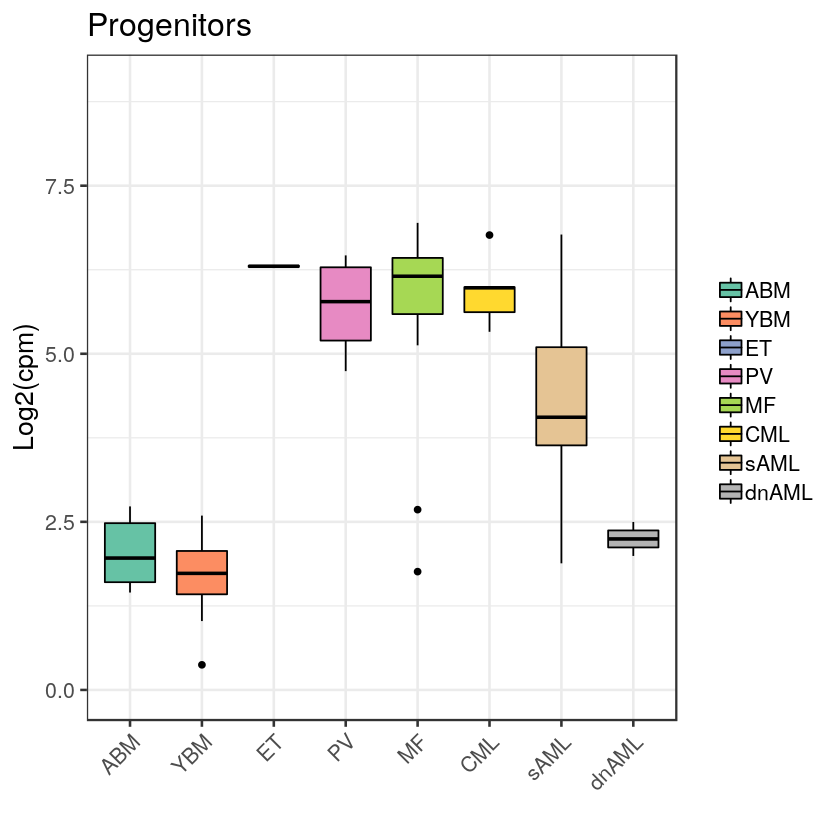

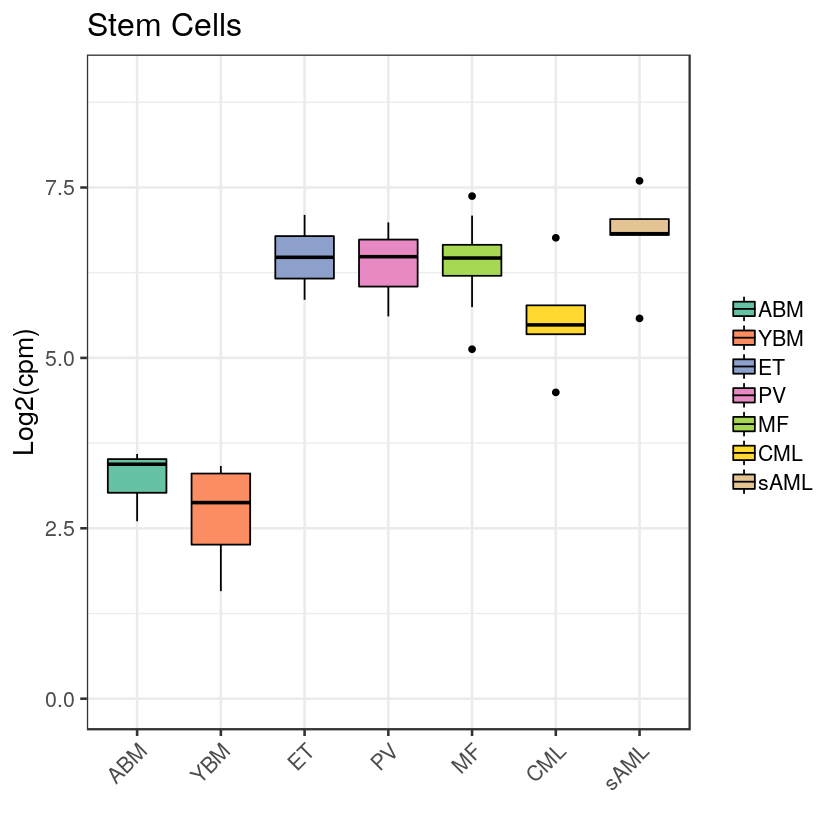

In [52]:
STAT3b.lcpm.Prog.filt.pheno.melt <- subset(STAT3ab.lcpm.Prog.filt.pheno.melt, Gene=="ENST00000585517")
STAT3b.lcpm.Stem.filt.pheno.melt <- subset(STAT3ab.lcpm.Stem.filt.pheno.melt, Gene=="ENST00000585517")

#pdf(file="Holm_Jamieson_Prog_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype.pdf", width=7, height=7)
#png(file="Holm_Jamieson_Prog_STAT3betaisoform_exprDistributionBoxplot_byPhenotype_04142020.png", width=7, height=7, units = 'in', res = 300)
ggboxplot(STAT3b.lcpm.Prog.filt.pheno.melt, palette="Set2", #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Phenotype2", y="value", #ylim=c(-1,8), #add="mean_se", 
          fill="Phenotype2") + ylim(c(0,9)) + xlab("") +
          #stat_compare_means(method="t.test", label = "p.signif", ref.group="ABM", label.y=8.8) + 
          theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Progenitors") +
          theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust=1))#+
          #stat_compare_means(method="t.test", label = "p.format", ref.group="ABM", label.y=9) 
#dev.off()

#pdf(file="Holm_Jamieson_Stem_STAT3alphaisoform_exprDistributionBoxplot_byPhenotype.pdf", width=7, height=7)
#png(file="Holm_Jamieson_Stem_STAT3betaisoform_exprDistributionBoxplot_byPhenotype_04142020.png", width=7, height=7, , units = 'in', res = 300)
ggboxplot(STAT3b.lcpm.Stem.filt.pheno.melt, #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Phenotype2", y="value", palette="Set2",#ylim=c(-1,8), #add="mean_se", 
          fill="Phenotype2") + ylim(c(0,9)) + xlab("") +
          #stat_compare_means(method="t.test", label = "p.signif", ref.group="ABM", label.y=8.8) + 
          theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Stem Cells") +
          theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust=1)) #+
          #stat_compare_means(method="t.test", label = "p.format", ref.group="ABM", label.y=9) 
#dev.off()

## Figure 5D
### Plot Correlation of ADAR p150 Expression and STAT3 in MF Samples for Progenitors

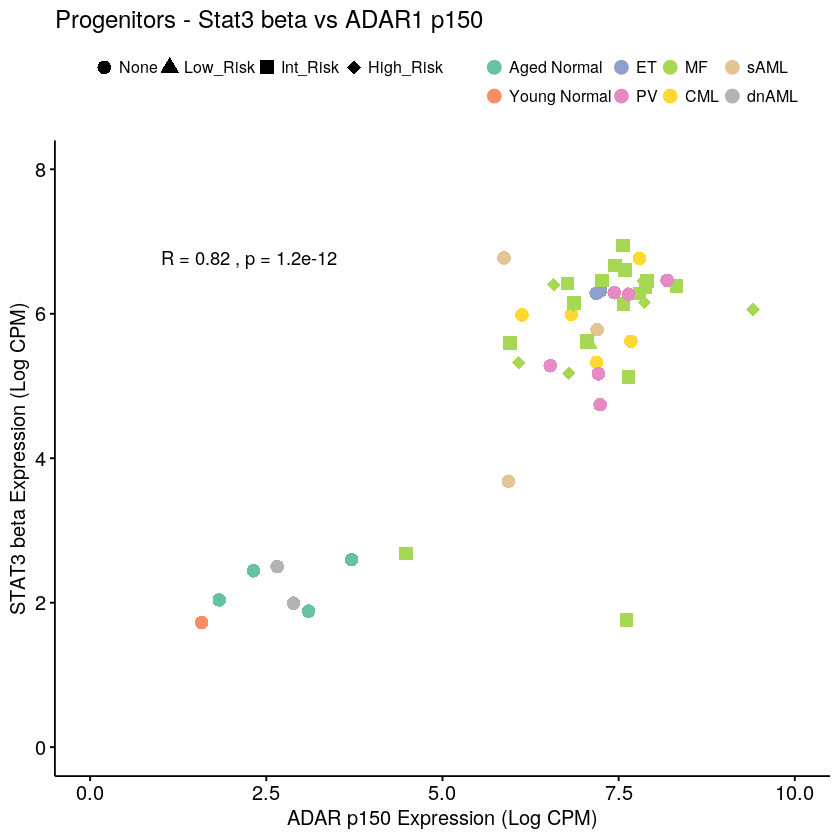

In [53]:
g <- rownames(STAT3.tx.exp.Prog.filt)[6]
lcpm.Prog.tmp <- STAT3.lcpm.Prog.filt.pheno.melt[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% g,]
colnames(lcpm.Prog.tmp)[2] <- "Sample"
lcpm.Prog.tmp$Phenotype2 <- as.character(lcpm.Prog.tmp$Phenotype2)
lcpm.Prog.tmp$Phenotype2[which(lcpm.Prog.tmp$Phenotype2 %in% c("ABM"))] <- "Aged Normal" 
lcpm.Prog.tmp$Phenotype2[which(lcpm.Prog.tmp$Phenotype2 %in% c("YBM"))] <- "Young Normal" 
lcpm.Prog.tmp$Phenotype2 <- factor(lcpm.Prog.tmp$Phenotype2, 
                                   levels=c("Aged Normal", "Young Normal", "ET", "PV", "MF", "CML", "sAML", "dnAML")) 
lcpm.Prog.tmp$Risk <- "None"
lcpm.Prog.tmp$Risk[lcpm.Prog.tmp$Phenotype2 %in% "MF"] <- risk.meta.Prog[
    match(lcpm.Prog.tmp$Patient_ID[lcpm.Prog.tmp$Phenotype2 %in% "MF"], 
          risk.meta.Prog$Tumor_Sample_Barcode),"Condition"]
lcpm.Prog.tmp$Risk <- factor(lcpm.Prog.tmp$Risk, 
                             levels=c("None", "Low_Risk", "Int_Risk", "High_Risk"))
lcpm.Prog.tmp$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Prog.tmp$Sample), 
                                                         gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.tmp$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Prog.tmp$Sample), 
                                                         gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Prog.tmp$ADARratio <- lcpm.Prog.tmp$ADARp150.expr - lcpm.Prog.tmp$ADARp110.expr
lcpm.Prog.tmp.filt <- subset(lcpm.Prog.tmp, ADARp150.expr > 0)
name2 <- paste0("MPN_Prog_Sample_STAT3_", g, "_vs_DetectableADARp150expr_ggScatter_shapeRisk_04102020.png")
q <- ggscatter(lcpm.Prog.tmp.filt, palette="Set2", xlim=c(0,10), ylim=c(0,8),
          x="ADARp150.expr", y="value", color = "Phenotype2",  shape="Risk", 
          title = 'Progenitors - Stat3 beta vs ADAR1 p150', size=3.5) +
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          stat_cor(output.type = "text", label.x = 1, na.rm=TRUE) +
          scale_shape_manual(values=c(16,17,15,18)) + 
          ylab(paste0("STAT3 beta", " Expression (Log CPM)")) + xlab("ADAR p150 Expression (Log CPM)") + 
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4)))
#png(file=name2, width=7, height=7, , units = 'in', res = 300)
print(q)
#dev.off()

## Figure 5D
### Plot Correlation of ADAR p150 Expression and STAT3 in MF Samples for HS Cells

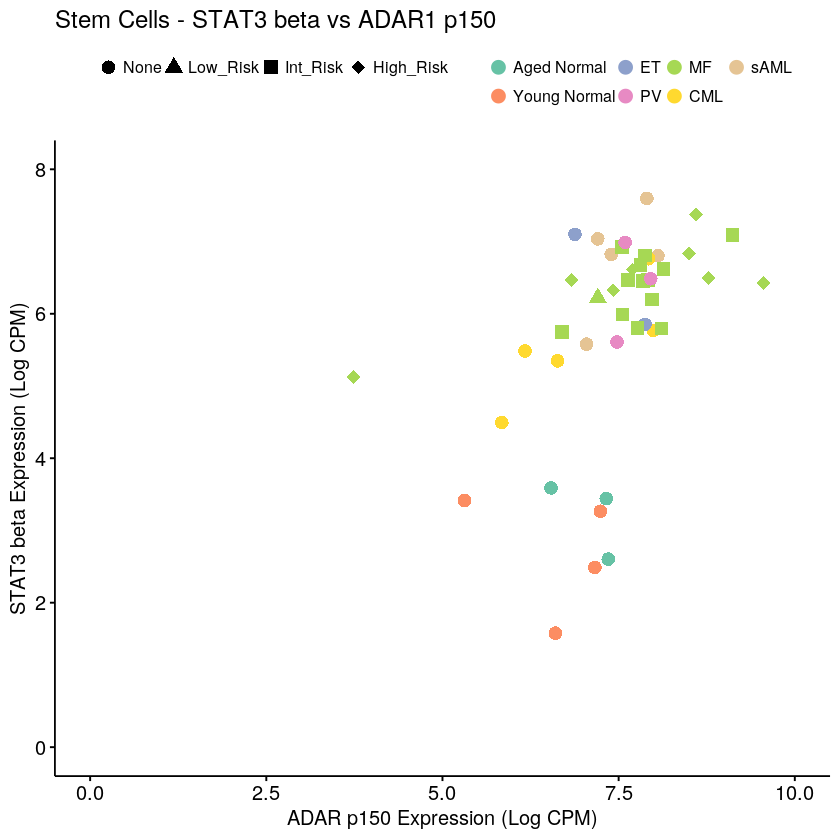

In [55]:
g <- rownames(STAT3.tx.exp.Stem.filt)[5]
lcpm.Stem.tmp <- STAT3.lcpm.Stem.filt.pheno.melt[STAT3.lcpm.Stem.filt.pheno.melt$Gene %in% g,]
colnames(lcpm.Stem.tmp)[2] <- "Sample"
lcpm.Stem.tmp$Phenotype2 <- as.character(lcpm.Stem.tmp$Phenotype2)
lcpm.Stem.tmp$Phenotype2[which(lcpm.Stem.tmp$Phenotype2 %in% c("ABM"))] <- "Aged Normal"
lcpm.Stem.tmp$Phenotype2[which(lcpm.Stem.tmp$Phenotype2 %in% c("YBM"))] <- "Young Normal"
lcpm.Stem.tmp$Phenotype2 <- factor(lcpm.Stem.tmp$Phenotype2, 
                                   levels=c("Aged Normal", "Young Normal", "ET", "PV", "MF", "CML", "sAML"))
lcpm.Stem.tmp$Risk <- "None"
lcpm.Stem.tmp$Risk[lcpm.Stem.tmp$Phenotype2 %in% "MF"] <- risk.meta.Stem[
    match(lcpm.Stem.tmp$Patient_ID[lcpm.Stem.tmp$Phenotype2 %in% "MF"], 
          risk.meta.Stem$Tumor_Sample_Barcode),"Condition"]
lcpm.Stem.tmp$Risk <- factor(lcpm.Stem.tmp$Risk, 
                             levels=c("None", "Low_Risk", "Int_Risk", "High_Risk"))

lcpm.Stem.tmp$ADARp110.expr <- ADAR.tx.all.lcpm[1, match(gsub("_S[0-9]*$", "", lcpm.Stem.tmp$Sample), 
                                                         gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.tmp$ADARp150.expr <- ADAR.tx.all.lcpm[2, match(gsub("_S[0-9]*$", "", lcpm.Stem.tmp$Sample),
                                                         gsub("_S[0-9]*$", "", colnames(ADAR.tx.all.lcpm)))]
lcpm.Stem.tmp$ADARratio <- lcpm.Stem.tmp$ADARp150.expr - lcpm.Stem.tmp$ADARp110.expr

lcpm.Stem.tmp.filt <- subset(lcpm.Stem.tmp, ADARp150.expr > 0)
name2 <- paste0("MPN_Stem_Sample_STAT3_", g, "_vs_DetectableADARp150expr_ggScatter_shapeRisk_04102020.png")

q <- ggscatter(lcpm.Stem.tmp.filt, x="ADARp150.expr", y="value", color = "Phenotype2", shape="Risk", 
          title = 'Stem Cells - STAT3 beta vs ADAR1 p150', size=3.5, palette="Set2", xlim=c(0,10), ylim=c(0,8)) +
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          #stat_cor(output.type = "text", label.x = 1, na.rm=TRUE) +
          scale_shape_manual(values=c(16,17,15,18)) + 
          ylab(paste0("STAT3 beta", " Expression (Log CPM)")) + xlab("ADAR p150 Expression (Log CPM)") +
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4)))
#png(file=name2, width=7, height=7, , units = 'in', res = 300)
print(q)
#dev.off()

## Analysis of Expression of IL6ST Isoforms

In [56]:
IL6STtx <- gsub("[.].*$","", iso_gene_table_anno_pc[gsub("[.].*$","",iso_gene_table_anno_pc$gene_id) %in% "ENSG00000134352", "transcript_id"])
IL6STtx


[1] "ENST00000336909" "ENST00000381286" "ENST00000381287" "ENST00000381293"
 [5] "ENST00000381294" "ENST00000381298" "ENST00000396816" "ENST00000423954"
 [9] "ENST00000502326" "ENST00000503773" "ENST00000506241" "ENST00000522633"
[13] "ENST00000523039" "ENST00000536319" "ENST00000577363" "ENST00000583149"

## Figure 2C
### IL6ST Isoform Expression Across MPN Phentypes in Hematopoietic Stem Cells and Progenitor Cells

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”

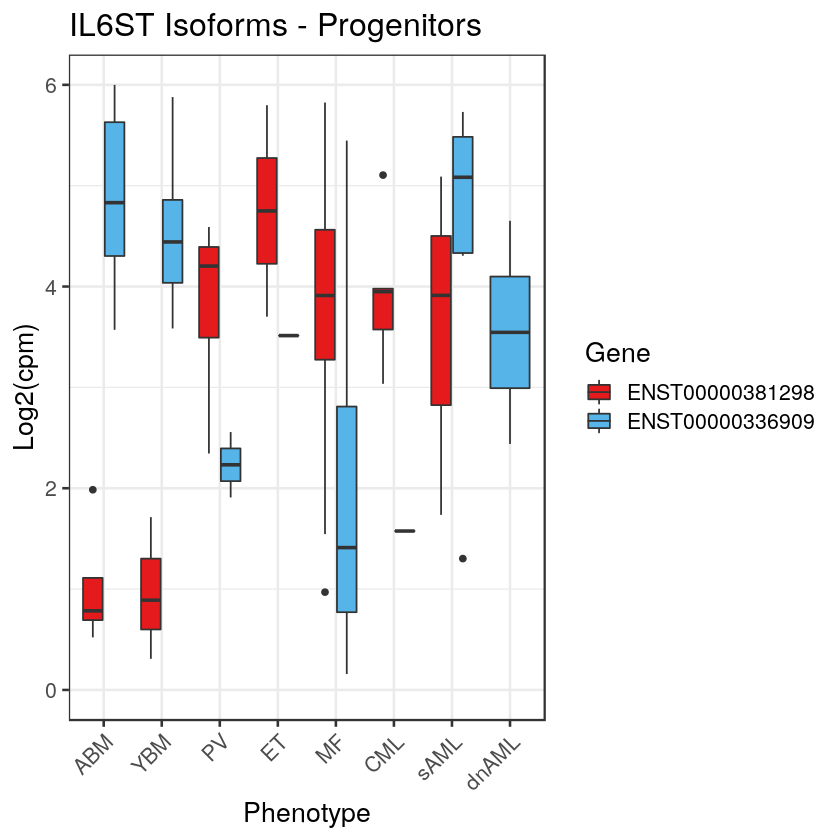

In [57]:
IL6ST.tx.lcpm.Prog <- lcpm2.Prog.filt[rownames(lcpm2.Prog.filt) %in% IL6STtx,]
#IL6ST.tx.lcpm.Prog
IL6ST.tx.lcpm.Prog <- IL6ST.tx.lcpm.Prog[c(3,1),]
IL6ST.lcpm.Prog.filt <- IL6ST.tx.lcpm.Prog
IL6ST.lcpm.Prog.filt.pheno <- cbind(Gene=rownames(IL6ST.lcpm.Prog.filt), IL6ST.lcpm.Prog.filt)

IL6ST.lcpm.Prog.filt.pheno.melt <- melt(IL6ST.lcpm.Prog.filt.pheno[,-1])
IL6ST.lcpm.Prog.filt.pheno.melt <- IL6ST.lcpm.Prog.filt.pheno.melt[as.numeric(as.character(IL6ST.lcpm.Prog.filt.pheno.melt$value)) > -1,] 
IL6ST.lcpm.Prog.filt.pheno.melt$Phenotype <- meta2.Prog.filt[match(gsub("_S[0-9]+$","",IL6ST.lcpm.Prog.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta2.Prog.filt$Sample)),"Sample.type3"]

IL6ST.lcpm.Prog.filt.pheno.melt$Phenotype <- factor(as.character(IL6ST.lcpm.Prog.filt.pheno.melt$Phenotype), 
                                              levels=c("ABM", "YBM", "PV","ET", "MF", "CML", "sAML", "dnAML"))

colnames(IL6ST.lcpm.Prog.filt.pheno.melt)[1] <- "Gene" 
IL6ST.lcpm.Prog.filt.pheno.melt <- IL6ST.lcpm.Prog.filt.pheno.melt[!is.na(IL6ST.lcpm.Prog.filt.pheno.melt$Gene),]
IL6ST.lcpm.Prog.filt.pheno.melt$value <- as.numeric(as.character(IL6ST.lcpm.Prog.filt.pheno.melt$value))

IL6ST.lcpm.Prog.filt.pheno.melt$value <- as.numeric(as.character(IL6ST.lcpm.Prog.filt.pheno.melt$value))
#pdf(file="Holm_Jamieson_Prog_IL6STisoform_detectableExprDistribution_byPhenotype_04132020.pdf", width=7, height=7)
ggplot(IL6ST.lcpm.Prog.filt.pheno.melt, aes(x=Phenotype, y=value)) + labs(title="IL6ST Isoforms - Progenitors") +
  ylab("Log2(cpm)") + geom_boxplot(aes(fill=Gene)) + theme_bw(base_size = 16) + ylim(0,6) + 
  scale_fill_manual(values=c("#e41a1c","#56B4E9")) + theme(axis.text.x = element_text(angle = 45, hjust=1))
#dev.off()


[1]  2 47

,X27_8,X26_2,X26_1,X26_7,X26_3,X26_4,X26_5,X26_6,X562.PB.Stem_S0,X598.PB.Stem_S12,⋯,X571.BM.Stem_S0,X608.BM.Stem_S0,X616.BM.Stem_S0,X703.PB.Stem_S0,X727.PB.Stem_S5,X591.BM.Stem_S0,X591.PB.Stem_S0,X672A.PB.Stem_S5,X672B.PB.Stem_S8,X735.PB.Stem_S7
ENST00000381298,5.448214,-6.7912118,8.635593,5.893791,3.963431,5.621104,-6.295073,3.268336,4.735411,3.4788219,⋯,7.1042269,4.449799,4.781555,1.896041,4.94156,9.032304,6.032011,6.593875,4.727630,4.020206
ENST00000503773,-6.791212,0.5009222,4.828484,-6.791212,1.407654,1.374477,-6.791212,1.582252,2.082423,0.7151304,⋯,0.9747787,-6.791212,-6.791212,-2.335749,2.27639,6.663943,1.862690,4.211412,1.582176,-6.791212


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”

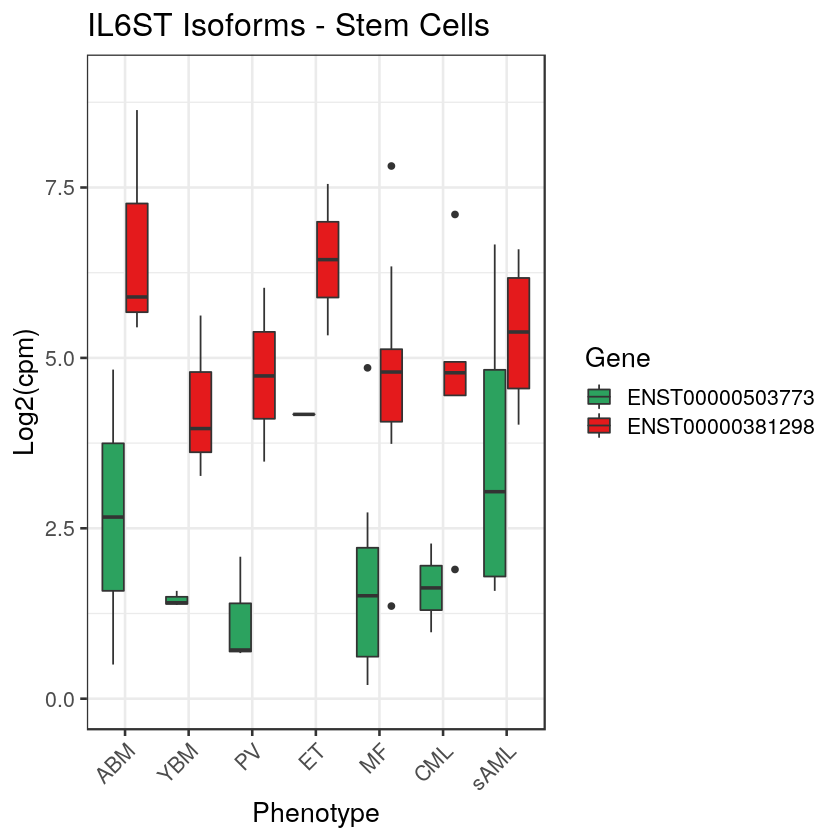

In [58]:
IL6ST.tx.lcpm.Stem <- lcpm2.Stem.filt[rownames(lcpm2.Stem.filt) %in% IL6STtx,]
dim(IL6ST.tx.lcpm.Stem)
head(IL6ST.tx.lcpm.Stem)
IL6ST.tx.lcpm.Stem <- IL6ST.tx.lcpm.Stem[c(2,1),]
IL6ST.lcpm.Stem.filt <- IL6ST.tx.lcpm.Stem
IL6ST.lcpm.Stem.filt.pheno <- cbind(Gene=rownames(IL6ST.lcpm.Stem.filt), IL6ST.lcpm.Stem.filt)

IL6ST.lcpm.Stem.filt.pheno.melt <- melt(IL6ST.lcpm.Stem.filt.pheno[,-1])
IL6ST.lcpm.Stem.filt.pheno.melt <- IL6ST.lcpm.Stem.filt.pheno.melt[as.numeric(as.character(IL6ST.lcpm.Stem.filt.pheno.melt$value)) > -1,] 

IL6ST.lcpm.Stem.filt.pheno.melt$Phenotype <- meta2.Stem.filt[match(gsub("_S[0-9]+$","",IL6ST.lcpm.Stem.filt.pheno.melt$Var2),
                                                                     gsub("_S[0-9]+$","",meta2.Stem.filt$Sample)),"Sample.type3"]

IL6ST.lcpm.Stem.filt.pheno.melt$Phenotype <- factor(as.character(IL6ST.lcpm.Stem.filt.pheno.melt$Phenotype), 
                                              levels=c("ABM", "YBM", "PV","ET", "MF", "CML", "sAML"))

colnames(IL6ST.lcpm.Stem.filt.pheno.melt)[1] <- "Gene" 
IL6ST.lcpm.Stem.filt.pheno.melt <- IL6ST.lcpm.Stem.filt.pheno.melt[!is.na(IL6ST.lcpm.Stem.filt.pheno.melt$Gene),]
IL6ST.lcpm.Stem.filt.pheno.melt$value <- as.numeric(as.character(IL6ST.lcpm.Stem.filt.pheno.melt$value))

IL6ST.lcpm.Stem.filt.pheno.melt$value <- as.numeric(as.character(IL6ST.lcpm.Stem.filt.pheno.melt$value))

#pdf(file="Holm_Jamieson_HSC_IL6STisoform_DetectableExprDistribution_byPhenotype_4132020.pdf", width=7, height=7)
ggplot(IL6ST.lcpm.Stem.filt.pheno.melt, aes(x=Phenotype, y=value)) + labs(title="IL6ST Isoforms - Stem Cells") +
  ylab("Log2(cpm)") + geom_boxplot(aes(fill=Gene)) + theme_bw(base_size = 16) + ylim(0,9) +
  scale_fill_manual(values=c("#2ca25f", "#e41a1c" )) + theme(axis.text.x = element_text(angle = 45, hjust=1))
#dev.off()

## Fig 3F
### Plot CDK13 Expression by Phenotype in Progenitor and Hemapoietic Stem Cells

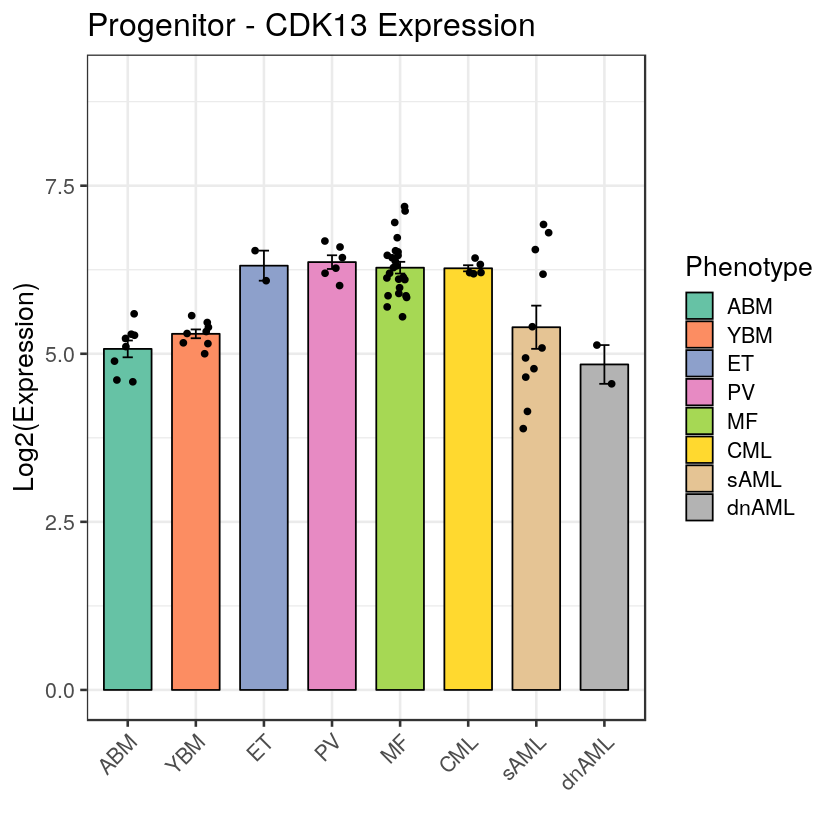

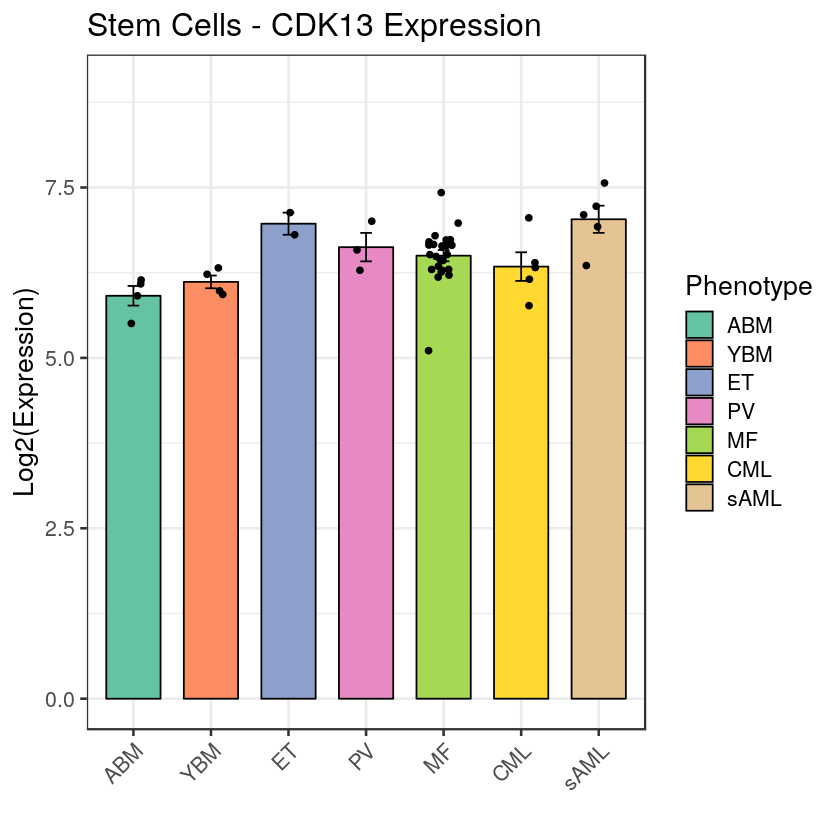

In [12]:
gene.Prog.cdk13.log <- cbind(meta2.Prog.filt, CDK13=as.numeric(lcpm2.Prog[gene.Prog.filt$SYMBOL %in% "CDK13"]))
gene.Stem.cdk13.log <- cbind(meta2.Stem.filt, CDK13=as.numeric(lcpm2.Stem[gene.Stem.filt$SYMBOL %in% "CDK13"]))

#pdf(file="Progenitor_CDK13_ABM_YBM_log2expressionBarplot_withjitter_04142020.pdf", width=7, height=7)
ggbarplot(gene.Prog.cdk13.log, x="Phenotype4", y="CDK13", add=c("mean_se", "jitter"), fill="Phenotype4",
         palette="Set2") + 
    theme_bw(base_size=16) + theme(axis.text.x = element_text(angle = 45, hjust=1)) + xlab("") + ylim(0,9) +
    labs(fill="Phenotype") + ylab("Log2(Expression)") + labs(title="Progenitor - CDK13 Expression") #+ 
#dev.off()
#pdf(file="Stem_CDK13_ABM_YBM_log2expressionBarplot_withjitter_04142020.pdf", width=7, height=7)
ggbarplot(gene.Stem.cdk13.log, x="Sample.type3", y="CDK13", add=c("mean_se", "jitter"), fill="Sample.type3",
         palette="Set2") + 
     theme_bw(base_size=16) + theme(axis.text.x = element_text(angle = 45, hjust=1)) + xlab("") + ylim(0,9) +
    labs(fill="Phenotype") + ylab("Log2(Expression)") + labs(title="Stem Cells - CDK13 Expression") #+ 
#dev.off()


## Supplementary Fig S4B
### Plot SUMF2 Expression by Phenotype in Progenitor and Hemapoietic Stem Cells

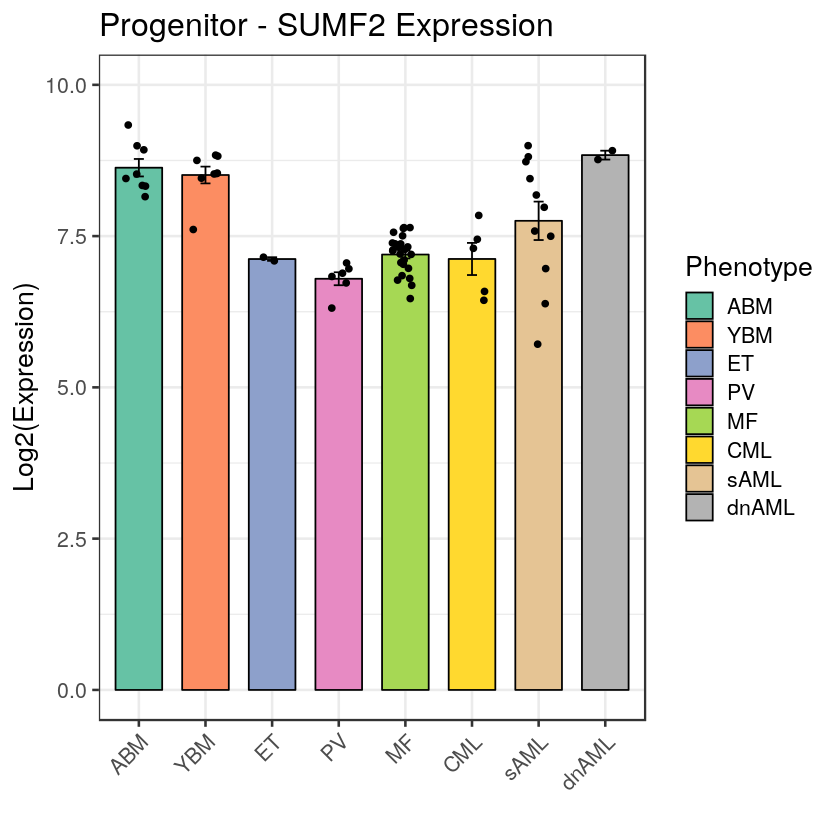

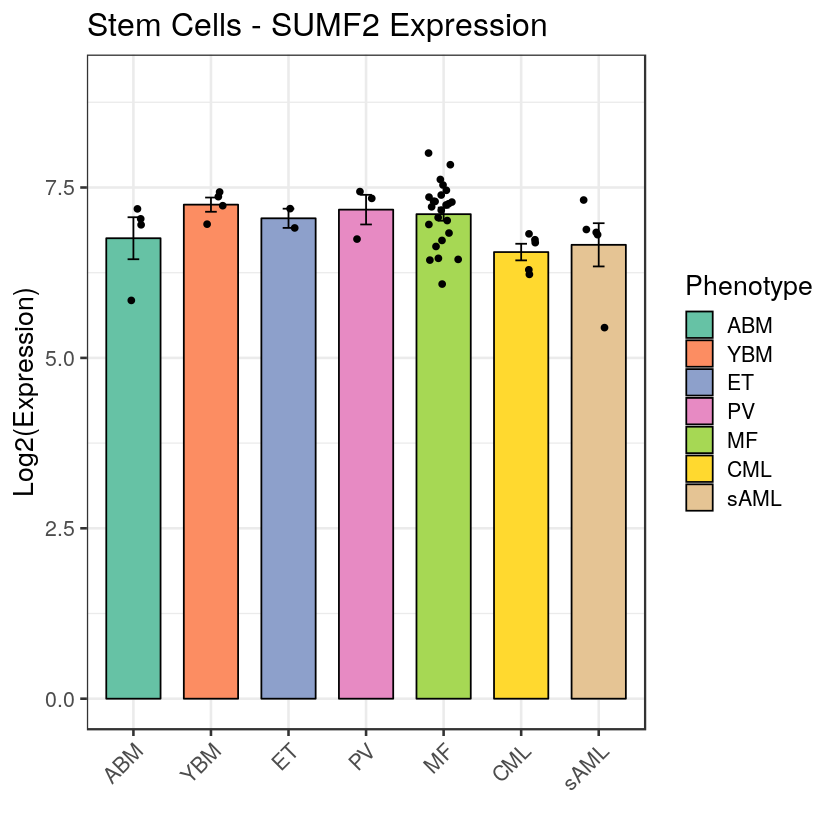

In [13]:
gene.Prog.sumf2.log <- cbind(meta2.Prog.filt, sumf2=as.numeric(lcpm2.Prog[gene.Prog.filt$SYMBOL %in% "SUMF2"]))
gene.Stem.sumf2.log <- cbind(meta2.Stem.filt, sumf2=as.numeric(lcpm2.Stem[gene.Stem.filt$SYMBOL %in% "SUMF2"]))

#pdf(file="Progenitor_SUMF2_ABM_YBM_log2expressionBarplot_withjitter_04142020.pdf", width=7, height=7)
ggbarplot(gene.Prog.sumf2.log, x="Phenotype4", y="sumf2", add=c("mean_se", "jitter"), fill="Phenotype4",
         palette="Set2") + 
        theme_bw(base_size=16) + theme(axis.text.x = element_text(angle = 45, hjust=1)) + xlab("") + ylim(0,10) +
    labs(fill="Phenotype") + ylab("Log2(Expression)") + labs(title="Progenitor - SUMF2 Expression") #+ 
    #stat_compare_means(method="t.test", label = "p.format", ref.group="ABM", label.y=9.5)
#dev.off()
#pdf(file="Stem_SUMF2_ABM_YBM_log2expressionBarplot_withjitter_04142020.pdf", width=7, height=7)
ggbarplot(gene.Stem.sumf2.log, x="Sample.type3", y="sumf2", add=c("mean_se", "jitter"), fill="Sample.type3",
         palette="Set2") + 
    theme_bw(base_size=16) + theme(axis.text.x = element_text(angle = 45, hjust=1)) + xlab("") + ylim(0,9) +
    ylab("Log2(Expression)") + labs(fill="Phenotype") + labs(title="Stem Cells - SUMF2 Expression") #+
    #stat_compare_means(method="t.test", label = "p.format", ref.group="ABM", label.y=8) 
#dev.off()
